# 데이터셋 분석

### 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
from datetime import datetime
from datetime import timedelta
import missingno as msno
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "svg"

# Windows
mpl.rc("font", family='Malgun Gothic')

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'


## 데이터 불러오기

In [2]:
parquet_path = "D:/cp2_dataset/df_cat.parquet"
df = pd.read_parquet(parquet_path)
df.head()

,event_time,month,day,day_name,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_cat,sub_cat_1,sub_cat_2
0,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,44600062,2103807459595387724,no_cat,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,no_cat,None,None
1,2019-10-01 04:00:00+04:00,10,1,Tuesday,4,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,appliances,environment,water_heater
2,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,17200506,2053013559792632471,furniture.living_room.sofa,no_brand,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,furniture,living_room,sofa
3,2019-10-01 04:00:01+04:00,10,1,Tuesday,4,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,computers,notebook,None
4,2019-10-01 04:00:04+04:00,10,1,Tuesday,4,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,electronics,smartphone,None


In [3]:
df.shape

(42448764, 16)

### `.describe()` 확인
- `price` 컬럼 평균 약 290인 것에 비해, max 값이 약 2574
    - 이상치가 크다
- `event_type` 컬럼 가장 많은 값 `view`
- `category_code` 컬럼 가장 많은 값 `electronics.telephone`
- `brand` 컬럼 가장 많은 값 `samsung`
- `user_session` 컬럼 `count`는 42448764 인 것에 비해 `unique`는 9244421
    - `user_session` 여러개 잡힌 사람들 존재
    - 가장 오래 활동한 `user_session : fb075266-182d-4c11-b5f7-4e4dcdabd4a7	`

In [4]:
pd.options.display.float_format = '{:.0f}'.format

In [5]:
df.describe()

,month,day,hour,product_id,category_id,price,user_id
count,42448764,42448764,42448764,42448764,42448764,42448764,42448764
mean,10,16,14,10549932,2057404237940798720,290,533537148
std,0,9,6,11881907,18439264662054096,358,18523738
min,10,1,0,1000978,2053013552226107648,0,33869381
25%,10,9,10,1005157,2053013555464110592,66,515904318
50%,10,16,15,5000470,2053013555631882752,163,529696452
75%,10,23,19,16000305,2053013563424899840,359,551578838
max,11,31,23,60500010,2175419595093967616,2574,566280860


In [6]:
df.describe(include="object")

,day_name,event_type,category_code,brand,user_session,main_cat,sub_cat_1,sub_cat_2
count,42448764,42448764,42448764,42448764,42448764,42448764,37740845,17739570
unique,7,3,148,3446,9244421,17,63,99
top,Tuesday,view,electronics.smartphone,samsung,fb075266-182d-4c11-b5f7-4e4dcdabd4a7,electronics,smartphone,tire
freq,6759405,40779399,11507231,5282775,1159,16853504,11640652,1888744


## 이상치 확인
- 실제 이커머스 웹사이트의 로그데이터 기반
- 주로 다루는 제품 또한 고관여 제품
- 너무 높은 가격의 상품이라고 해서 잘못된 가격이 아닐 가능성이 높다
- 따라서, 이상치 따로 처리하지 않고 진행 에정

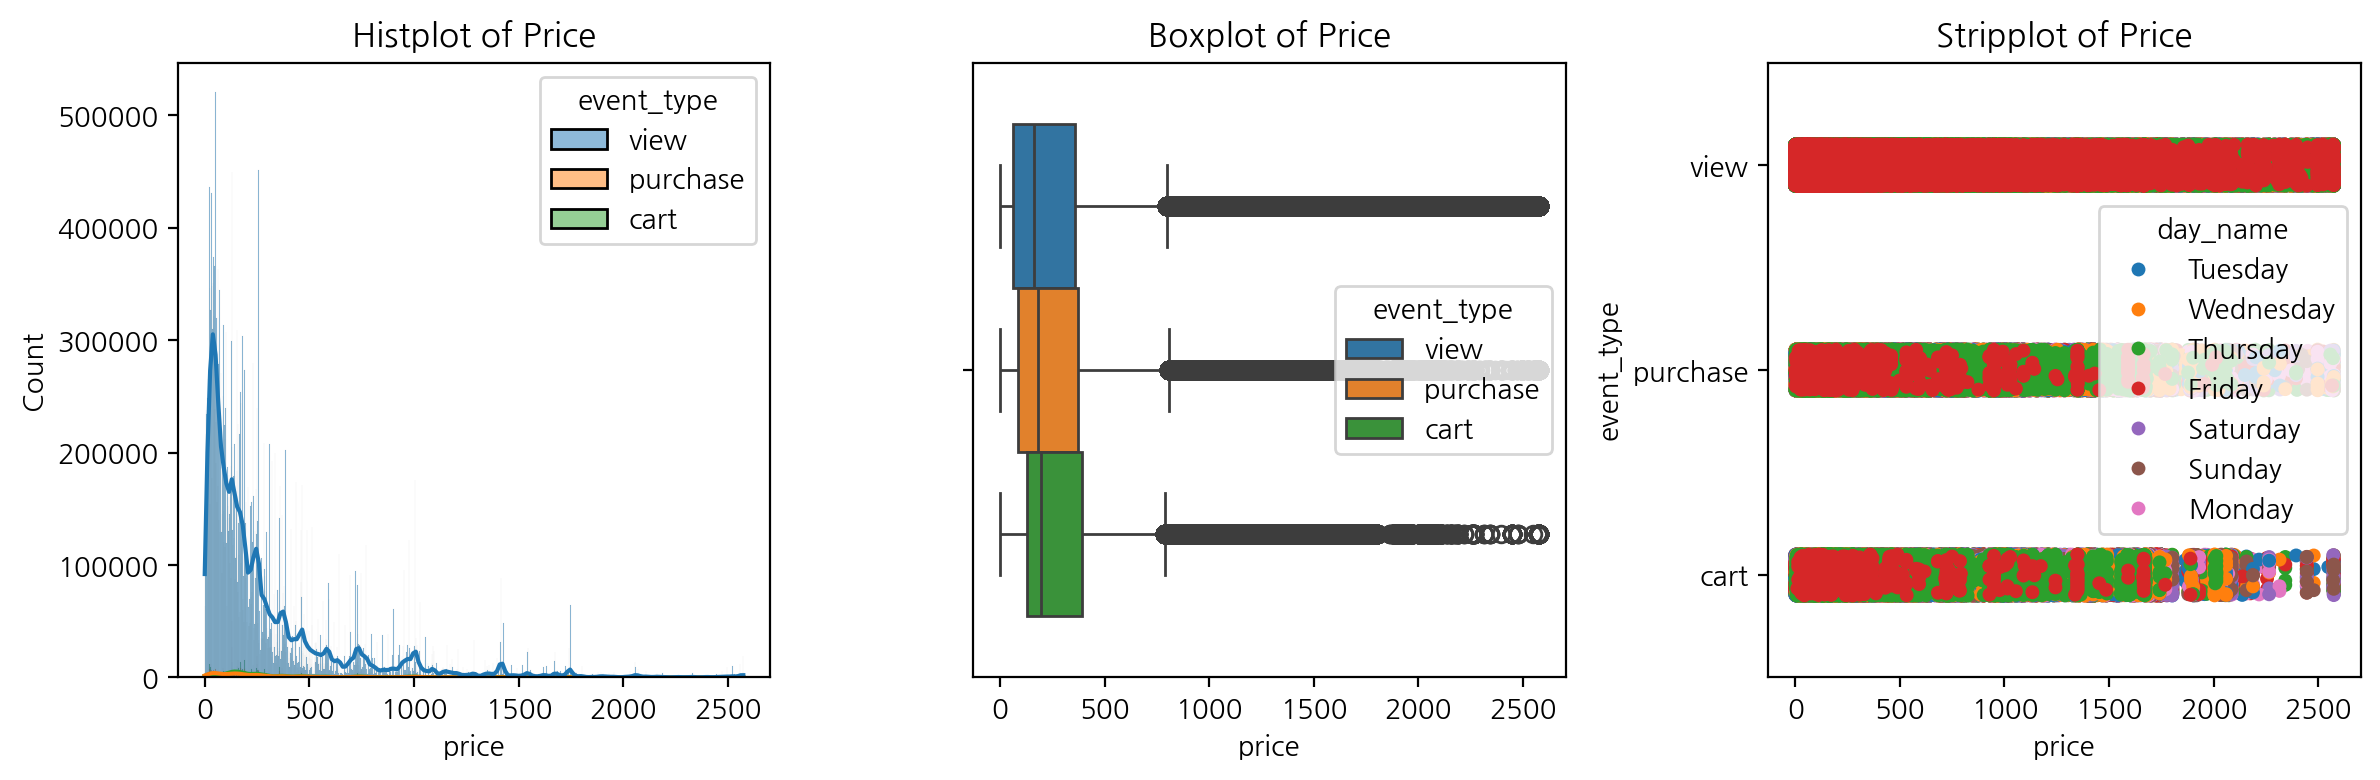

In [7]:
nrows, ncols = 1, 3
_, axes = plt.subplots(nrows, ncols, figsize=(12, 4))

p1 = sns.histplot(data=df, x="price", kde=True, hue="event_type", ax=axes[0])
p2 = sns.boxplot(data=df, x="price", hue="event_type", ax=axes[1])
# p3 = sns.stripplot(data=df, x="event_type", y="price", hue="day_name", ax=axes[2])
p3 = sns.stripplot(data=df, x="price", y="event_type", hue="day_name", ax=axes[2])

p1.set_title("Histplot of Price")
p2.set_title("Boxplot of Price")
p3.set_title("Stripplot of Price")

plt.tight_layout()
plt.show()

## 프로젝트 가설
- 고객 행동끼리는 서로 밀접한 관계가 있다
- 특정 요일, 시간에 니즈가 증가하는 카테고리가 있다
- 카테고리, 제품 특성에 따라 매력을 느끼는 포인트가 다를 것이다

In [8]:
# event_type 비율 확인
print(df['event_type'].value_counts())

print(df['event_type'].value_counts(normalize=True))

event_type
view        40779399
cart          926516
purchase      742849
Name: count, dtype: int64
event_type
view       1
cart       0
purchase   0
Name: proportion, dtype: float64


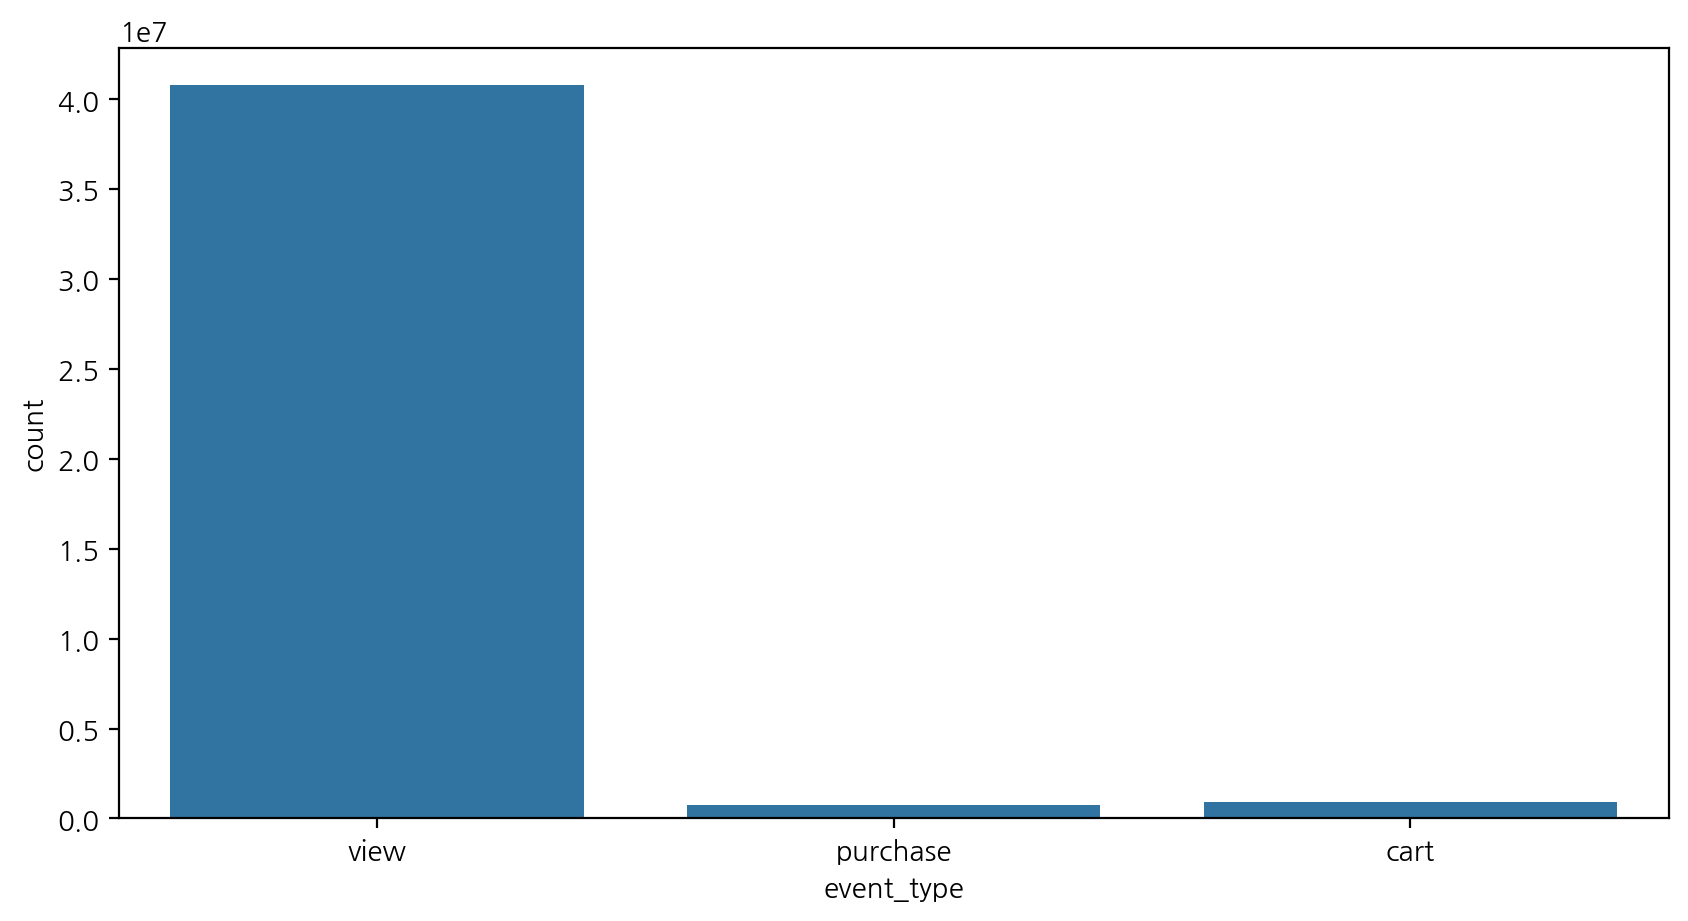

In [9]:
# event_type 분포
plt.figure(figsize=(10, 5))
cnt = sns.countplot(x=df["event_type"])
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 16 columns):
 #   Column         Dtype                     
---  ------         -----                     
 0   event_time     datetime64[ns, Asia/Dubai]
 1   month          int64                     
 2   day            int64                     
 3   day_name       object                    
 4   hour           int64                     
 5   event_type     object                    
 6   product_id     int64                     
 7   category_id    int64                     
 8   category_code  object                    
 9   brand          object                    
 10  price          float64                   
 11  user_id        int64                     
 12  user_session   object                    
 13  main_cat       object                    
 14  sub_cat_1      object                    
 15  sub_cat_2      object                    
dtypes: datetime64[ns, Asia/Dubai](1), 

## event_type 분석 

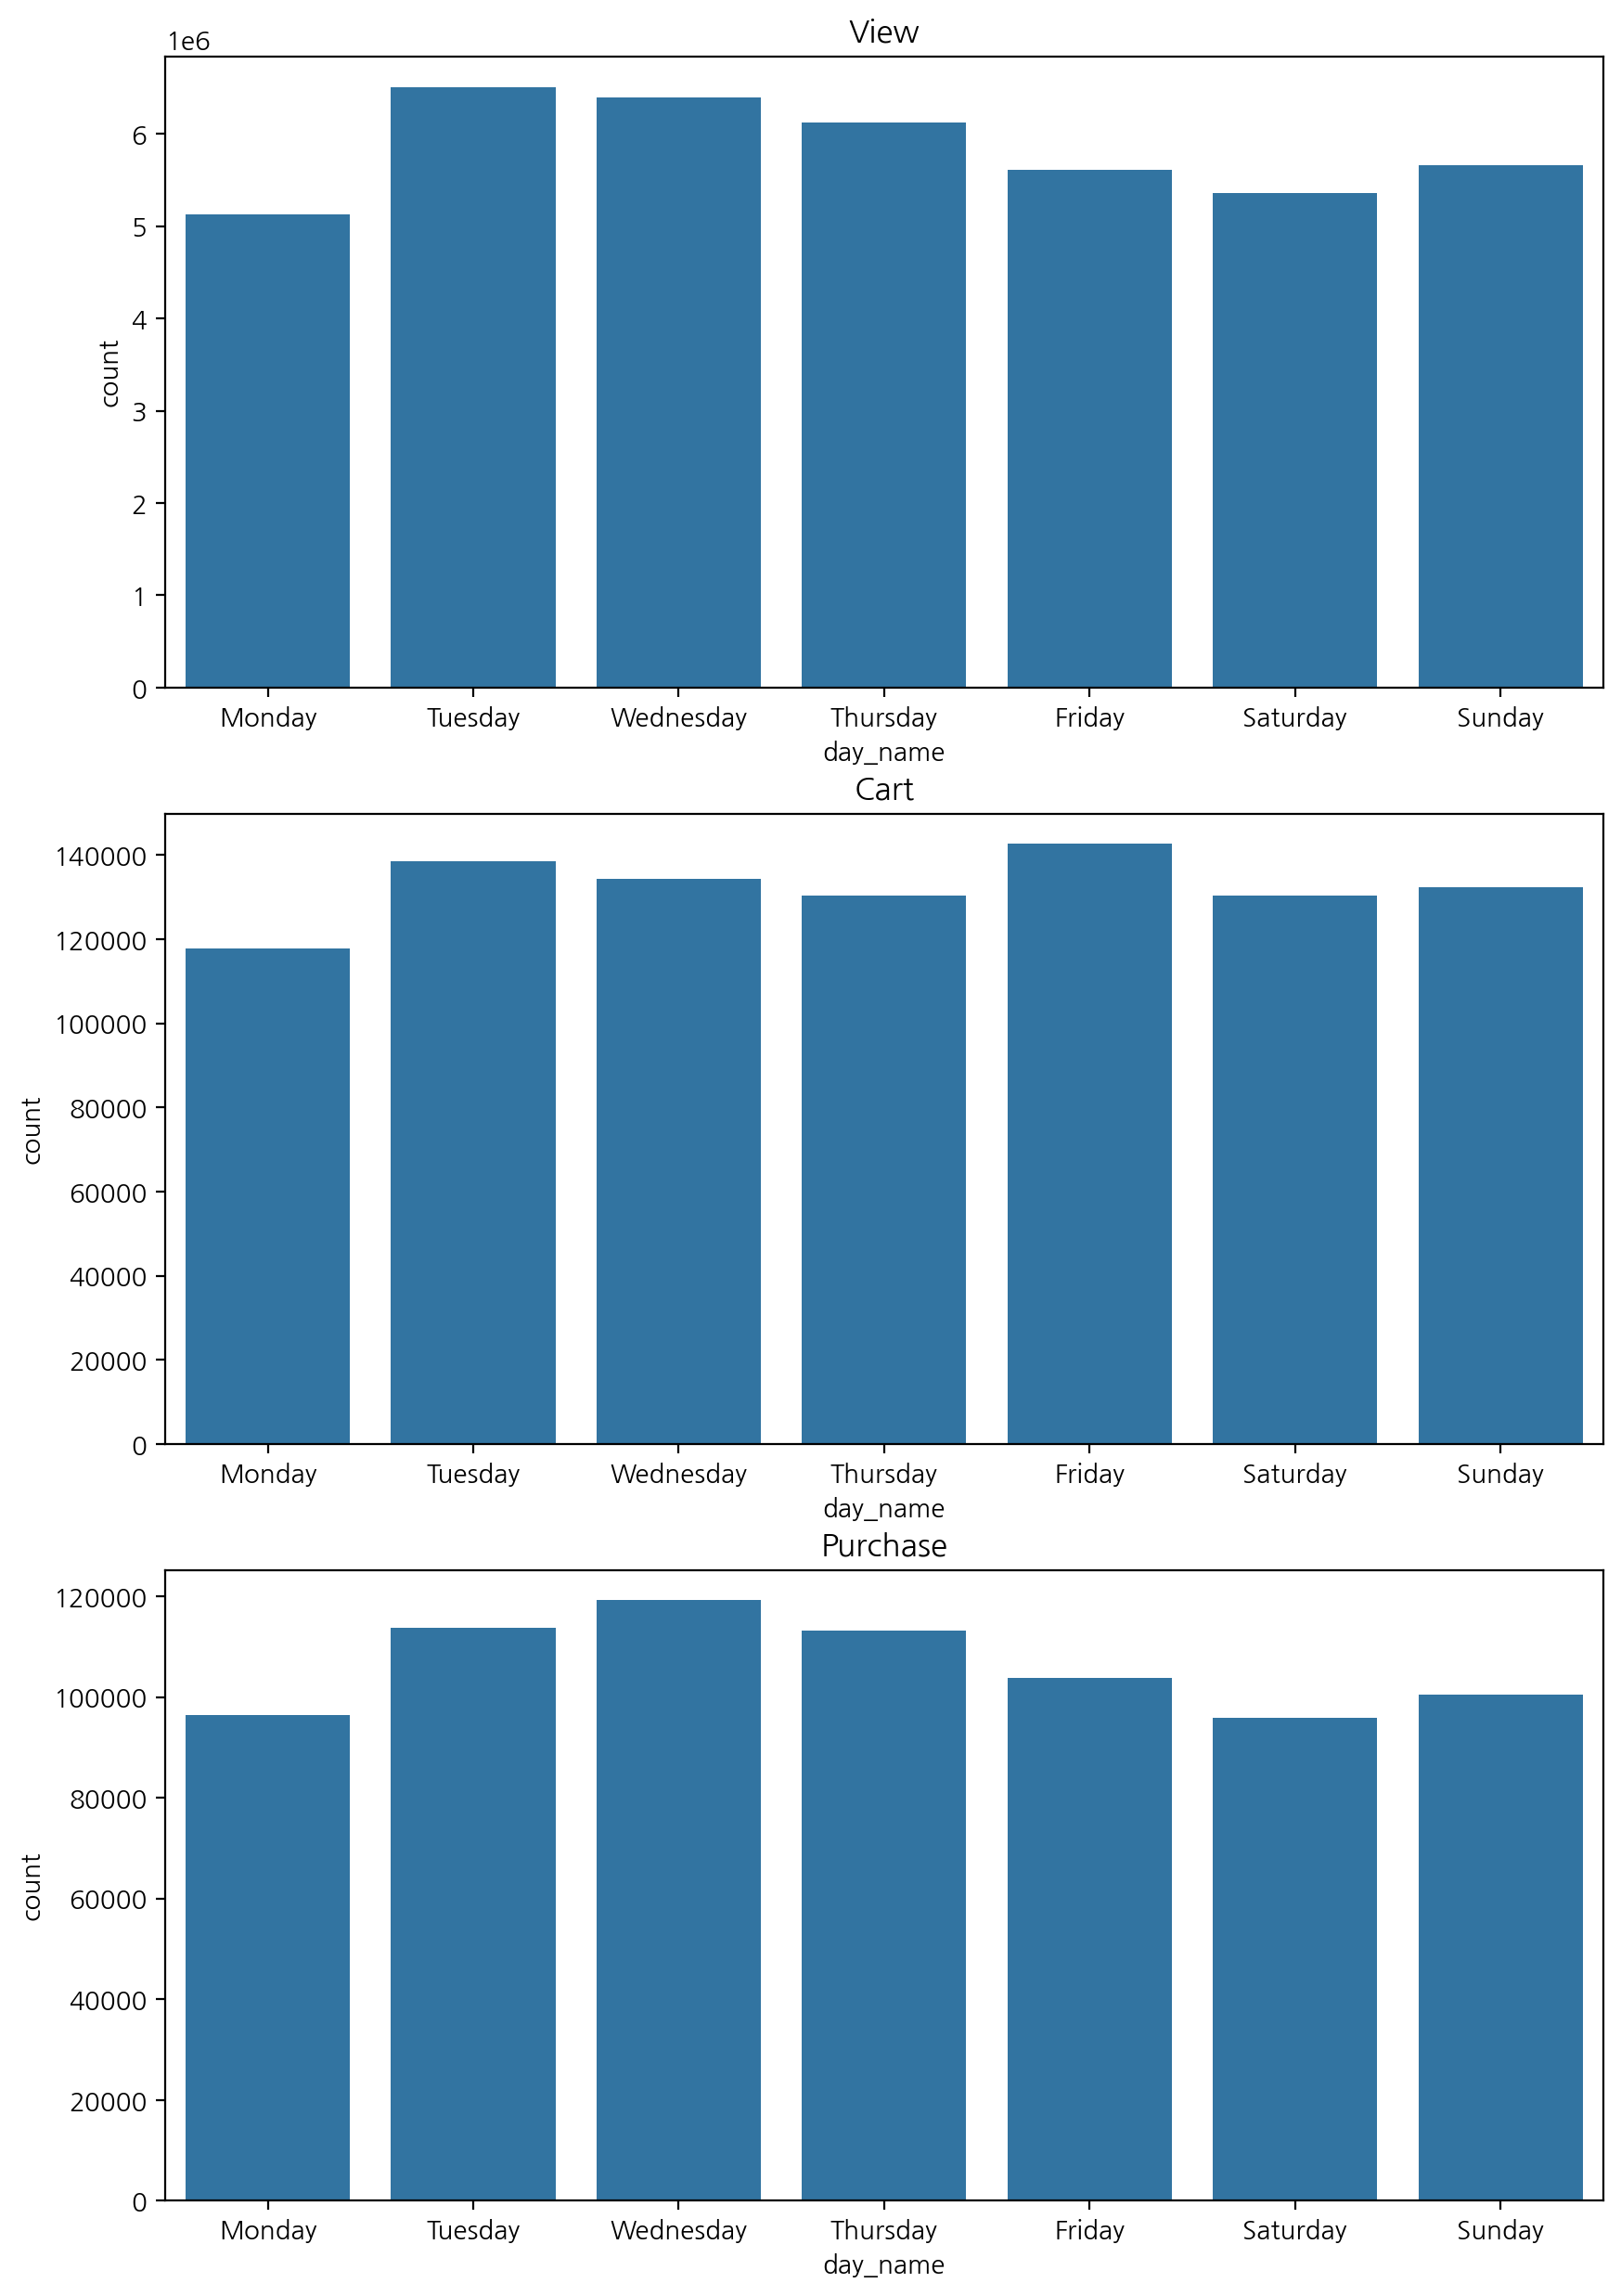

In [11]:
# 상품 클릭, 장바구니, 구매 조건 설정
view_cond = (df["event_type"] == "view")
cart_cond = (df["event_type"] == "cart")
purchase_cond = (df["event_type"] == "purchase")

# 조건별로 countplot 생성
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 요일별 상품 클릭한 숫자
view_cnt = sns.countplot(x=df[view_cond]["day_name"],
                         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],              
                         ax=ax[0])
view_cnt.set_title("View")

# 요일별 장바구니에 넣은 숫자
cart_cnt = sns.countplot(x=df[cart_cond]["day_name"],
                         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                         ax=ax[1])
cart_cnt.set_title("Cart")

# 요일별 구매한 숫자
purchase_cnt = sns.countplot(x=df[purchase_cond]["day_name"],
                             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                             ax=ax[2])
purchase_cnt.set_title("Purchase")

plt.show()

### 시간대별 시각화

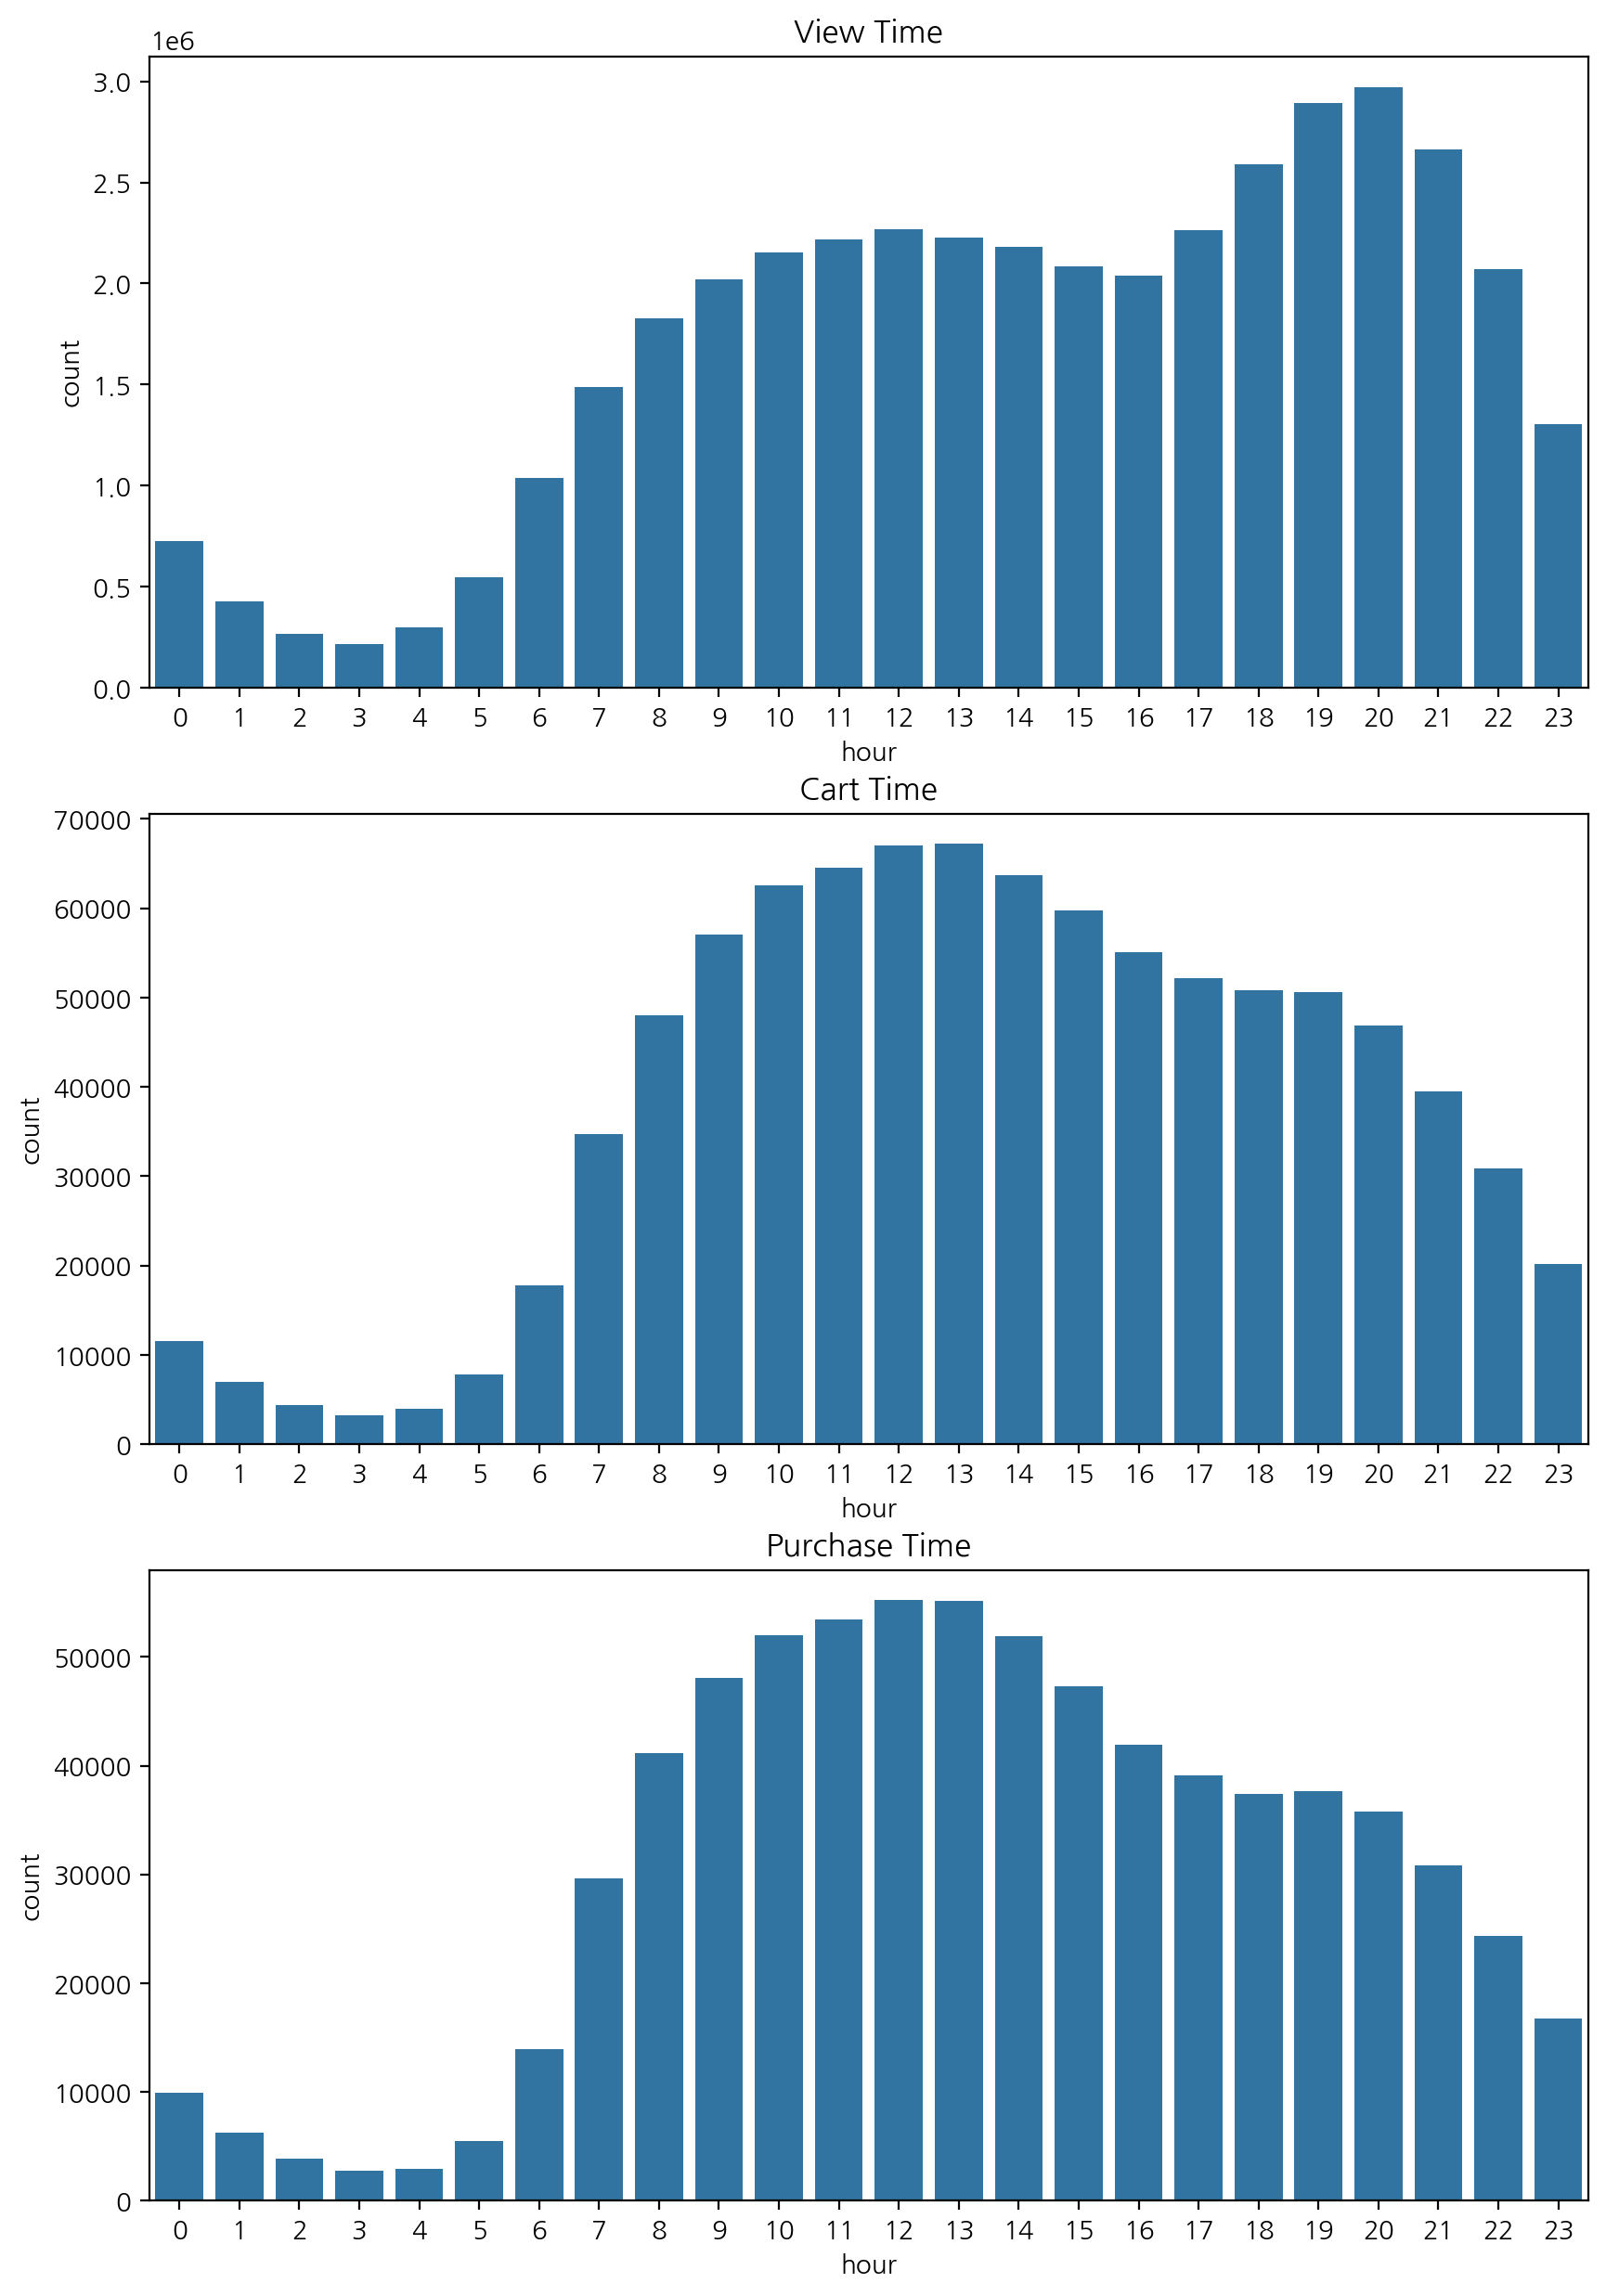

In [12]:
# 시간대별 View, Cart, Purchase

# 조건별로 countplot 생성
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 요일별 상품 클릭한 숫자
view_time_cnt = sns.countplot(x=df[view_cond]["hour"],
                              ax=ax[0])
view_time_cnt.set_title("View Time")

# 요일별 장바구니에 넣은 숫자
cart_time_cnt = sns.countplot(x=df[cart_cond]["hour"],
                         ax=ax[1])
cart_time_cnt.set_title("Cart Time")

# 요일별 구매한 숫자
purchase_time_cnt = sns.countplot(x=df[purchase_cond]["hour"],
                             ax=ax[2])
purchase_time_cnt.set_title("Purchase Time")

plt.show()

### 전체 category_code TOP 10 분석

In [13]:
# 카테고리 코드 TOP 10
df["category_code"].value_counts()[:10]

category_code
electronics.smartphone           11507231
no_cat                            3186832
auto.accessories.tire             1888744
accessories.jewelry               1676223
electronics.clocks                1632558
missing                           1521087
electronics.video.tv              1285034
computers.notebook                1137623
electronics.audio.headphone       1100188
appliances.kitchen.dishwasher     1047111
Name: count, dtype: int64

In [14]:
# 대분류 TOP 10
main_cat = df["category_code"].str.split(".").str[0].value_counts()[:10]
main_cat

category_code
electronics     16853504
appliances       6150611
auto             3422424
no_cat           3186832
furniture        2365596
computers        2324217
accessories      1914461
apparel          1643737
missing          1521087
construction     1425387
Name: count, dtype: int64

In [15]:
# 중분류 TOP 10
sub_cat_1st = df["category_code"].str.split(".").str[1].value_counts()[:10]
sub_cat_1st

category_code
smartphone     11640652
kitchen         4648890
accessories     3422424
jewelry         1676223
audio           1666325
clocks          1632558
environment     1447916
video           1298188
shoes           1208383
notebook        1137623
Name: count, dtype: int64

In [16]:
# 소분류 TOP 10
sub_cat_2nd = df["category_code"].str.split(".").str[2].value_counts()[:10]
sub_cat_2nd

category_code
tire             1888744
tv               1285034
headphone        1100188
dishwasher       1047111
refrigerators     887755
vacuum            801670
kit               694553
player            470208
set               466987
cooker            457909
Name: count, dtype: int64

In [17]:
# 브랜드 TOP 10
brand_top10 = df["brand"].value_counts()[:10]
brand_top10

brand
samsung     5282775
no_brand    4595993
apple       4122554
xiaomi      3083763
missing     1521087
huawei      1111205
lucente      655861
lg           562404
bosch        557090
oppo         482887
Name: count, dtype: int64

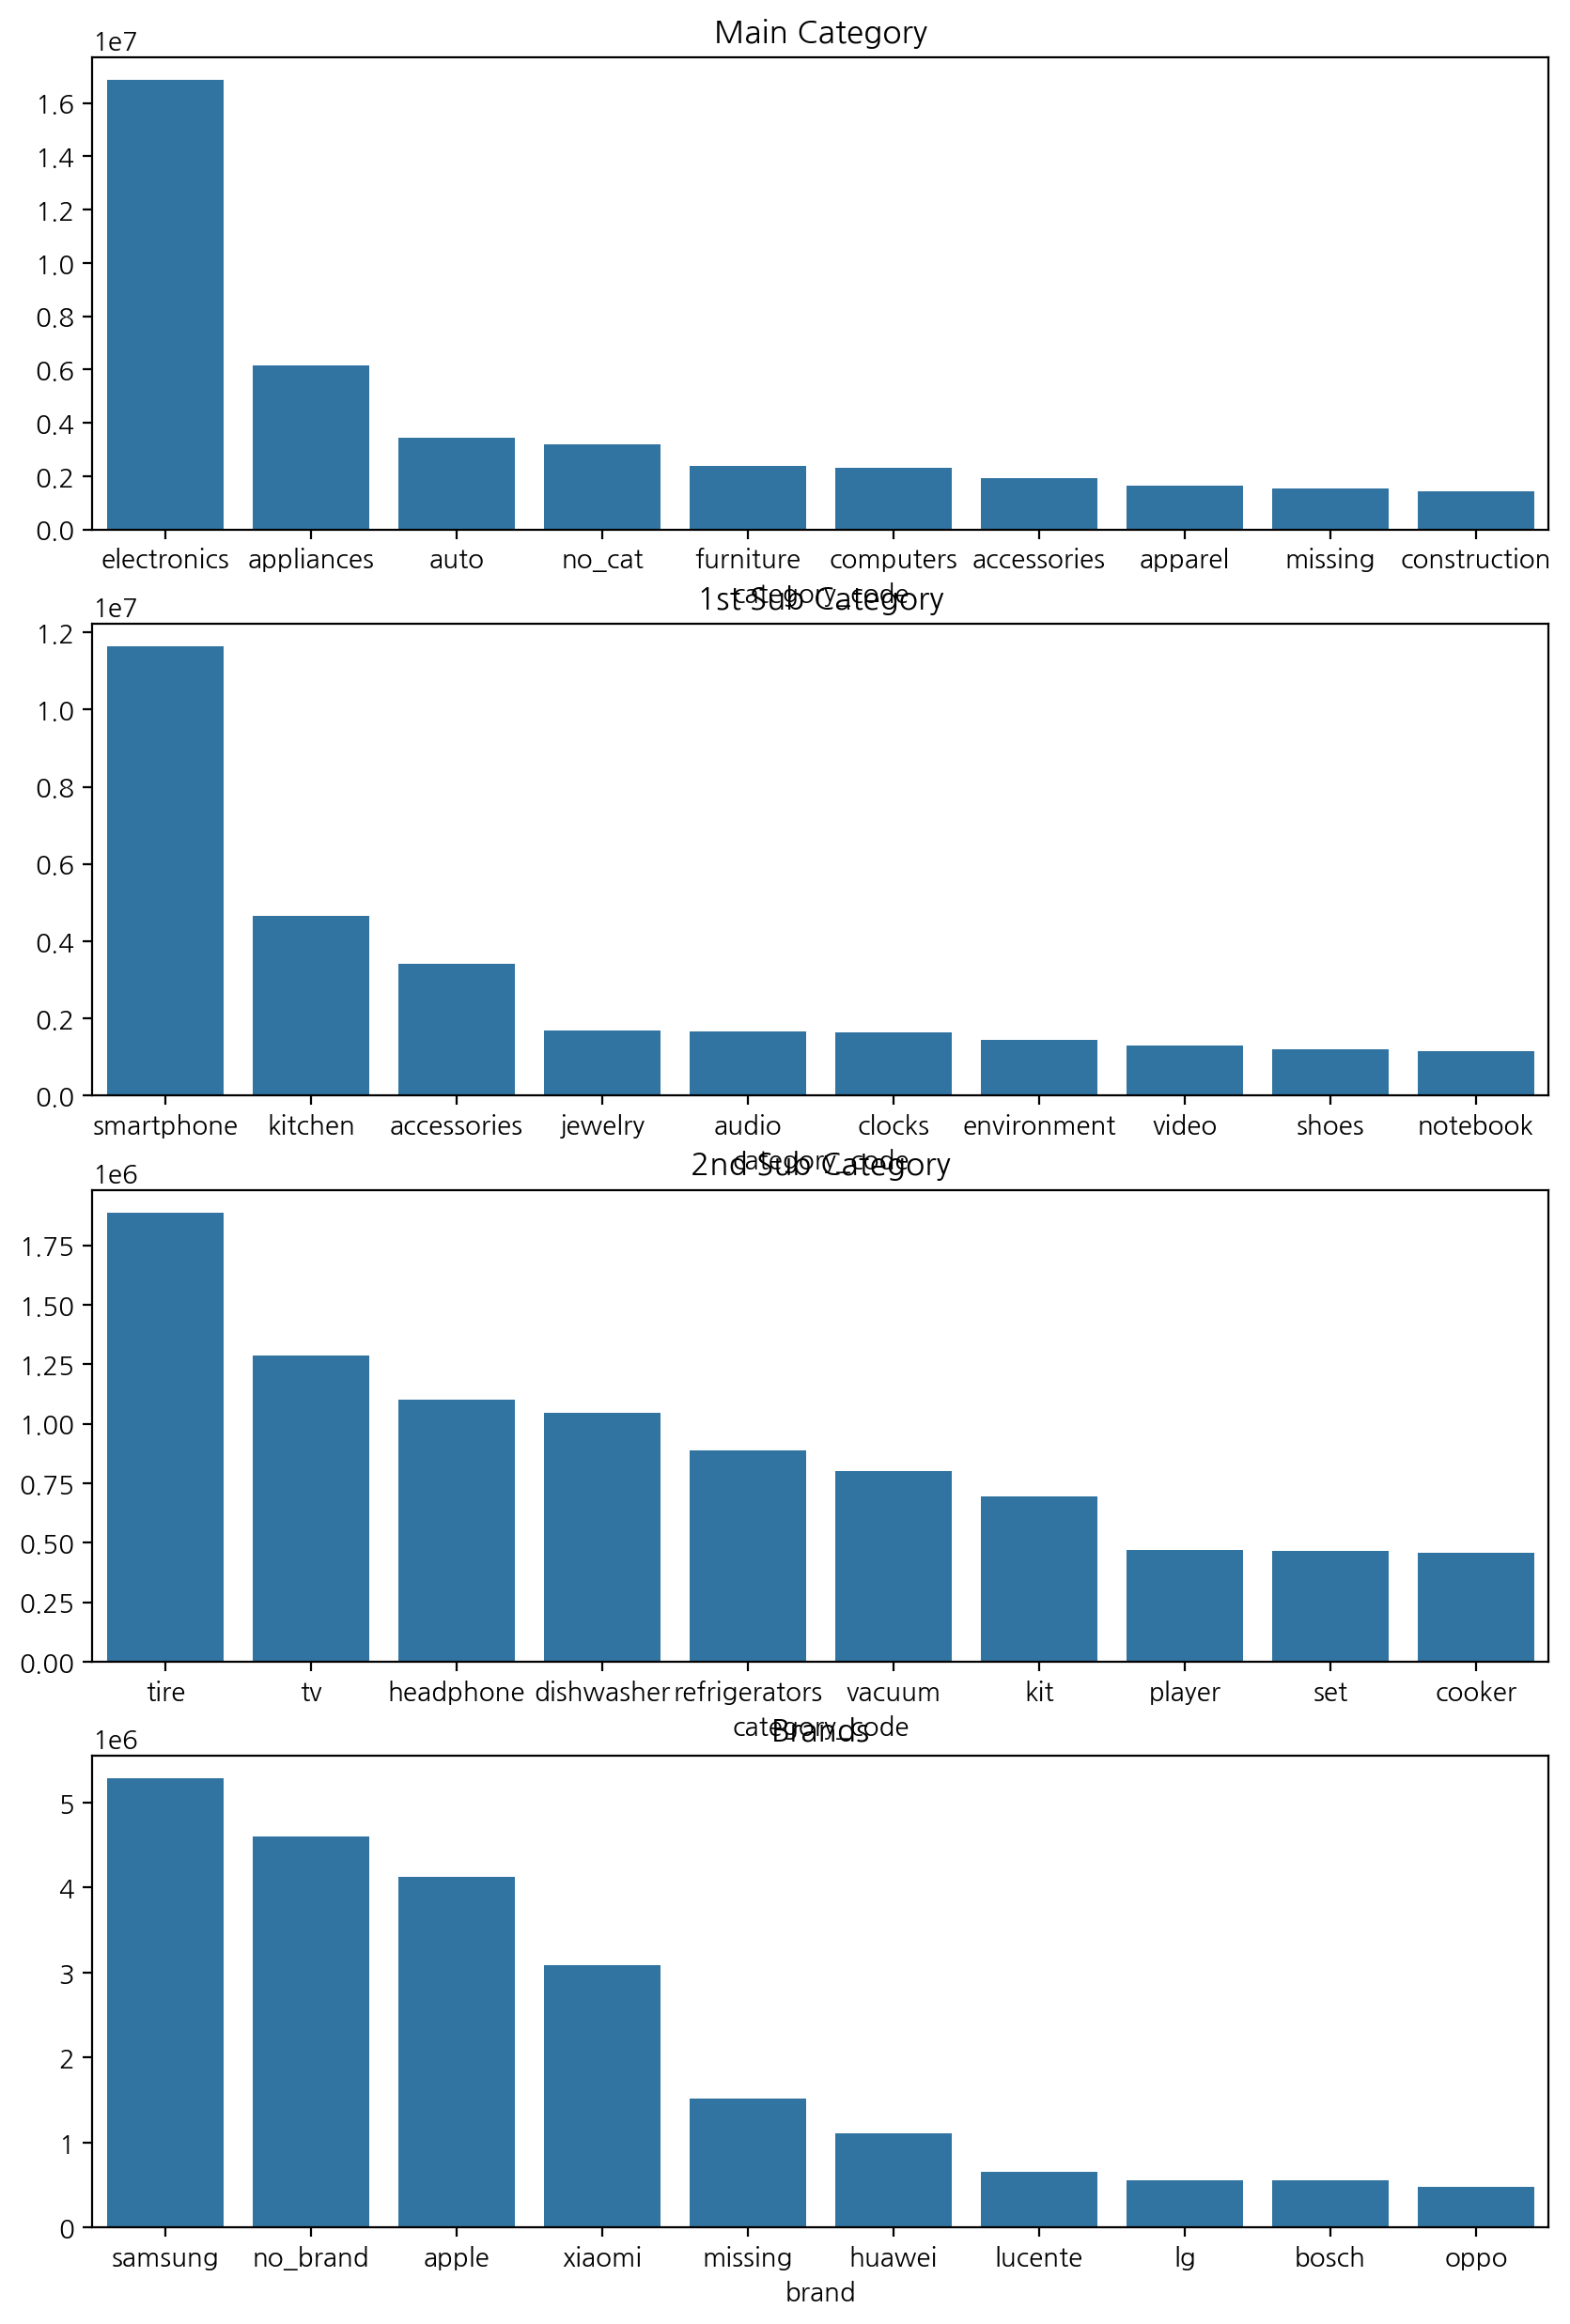

In [18]:
# 카테고리별 TOP 10 (대분류, 중분류, 소분류), 브랜드 TOP 10

# 조건별로 plot 생성
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

# 메인 카테고리 (대분류) Top 10
main_bar = sns.barplot(x=main_cat.index, 
                       y=main_cat.values,
                       ax=ax[0])
main_bar.set_title("Main Category")

# 중분류 Top 10
sub_1st_bar = sns.barplot(x=sub_cat_1st.index,
                          y=sub_cat_1st.values,
                          ax=ax[1])
sub_1st_bar.set_title("1st Sub Category")

# 소분류 Top 10
sub_2nd_bar = sns.barplot(x=sub_cat_2nd.index,
                          y=sub_cat_2nd.values,
                          ax=ax[2])
sub_2nd_bar.set_title("2nd Sub Category")

# 브랜드 Top 10
brand_bar = sns.barplot(x=brand_top10.index,
                        y=brand_top10.values,
                        ax=ax[3])
brand_bar.set_title("Brands")

plt.show()

## Category_code 기준 event_type 분석

count top 10

In [19]:
# event_type열 view, cart, purchase 조건 설정
view_cond = (df["event_type"] == "view")
cart_cond = (df["event_type"] == "cart")
purchase_cond = (df["event_type"] == "purchase")

# view, cart, purchase category_code TOP 10 검색
view_cat_count = df[view_cond]["category_code"].value_counts().head(10)
cart_cat_count = df[cart_cond]["category_code"].value_counts().head(10)
purchase_cat_count = df[purchase_cond]["category_code"].value_counts().head(10)

# view, cart, purchase category_code TOP 10 데이터프레임 생성
view_cat_df = pd.DataFrame(view_cat_count)
cart_cat_df = pd.DataFrame(cart_cat_count)
purchase_cat_df = pd.DataFrame(purchase_cat_count)

# view, cart, purchase top 10 데이터프레임 칼럼 변경
view_cat_df.reset_index(inplace=True)
view_cat_df.columns = ["view_category", "view_counts"]
view_cat_df["view_cnt_pct"] = view_cat_df["view_counts"].apply(lambda x : round(x / df[view_cond].shape[0], 2))

cart_cat_df.reset_index(inplace=True)
cart_cat_df.columns = ["cart_category", "cart_counts"]
cart_cat_df["cart_cnt_pct"] = cart_cat_df["cart_counts"].apply(lambda x : round(x / df[cart_cond].shape[0], 2))

purchase_cat_df.reset_index(inplace=True)
purchase_cat_df.columns = ["purchase_category", "purchase_counts"]
purchase_cat_df["purchase_cnt_pct"] = purchase_cat_df["purchase_counts"].apply(lambda x : round(x / df[purchase_cond].shape[0], 2))

# view, cart, purchase category_code TOP 10 데이터프레임 결합
vcp_top_10 = pd.concat([pd.concat([view_cat_df, cart_cat_df], axis=1), purchase_cat_df], axis=1)
vcp_top_10

,view_category,view_counts,view_cnt_pct,cart_category,cart_counts,cart_cnt_pct,purchase_category,purchase_counts,purchase_cnt_pct
0,electronics.smartphone,10619448,0,electronics.smartphone,549765,1,electronics.smartphone,338018,0
1,no_cat,3135201,0,electronics.audio.headphone,51143,0,auto.accessories.tire,44019,0
2,auto.accessories.tire,1823852,0,electronics.video.tv,41667,0,electronics.audio.headphone,30503,0
3,accessories.jewelry,1651840,0,electronics.clocks,40295,0,no_cat,28830,0
4,electronics.clocks,1565747,0,appliances.kitchen.dishwasher,24112,0,electronics.clocks,26516,0
5,missing,1501024,0,no_cat,22801,0,electronics.video.tv,25241,0
6,electronics.video.tv,1218126,0,auto.accessories.tire,20873,0,accessories.jewelry,24383,0
7,computers.notebook,1106406,0,appliances.environment.vacuum,17263,0,appliances.kitchen.dishwasher,17523,0
8,electronics.audio.headphone,1018542,0,computers.notebook,15627,0,computers.notebook,15590,0
9,appliances.kitchen.dishwasher,1005476,0,appliances.kitchen.refrigerators,13126,0,missing,14349,0


price top 10

In [20]:
# event_type열 view, cart, purchase 조건 설정
view_cond = (df["event_type"] == "view")
cart_cond = (df["event_type"] == "cart")
purchase_cond = (df["event_type"] == "purchase")

# view, cart, purchase category_code TOP 10 검색
view_cat_price = df[view_cond].groupby("category_code")["price"].sum().sort_values(ascending=False).head(10)
cart_cat_price = df[cart_cond].groupby("category_code")["price"].sum().sort_values(ascending=False).head(10)
purchase_cat_price = df[purchase_cond].groupby("category_code")["price"].sum().sort_values(ascending=False).head(10)

# view, cart, purchase category_code TOP 10 데이터프레임 생성
view_cat_price_df = pd.DataFrame(view_cat_price)
cart_cat_price_df = pd.DataFrame(cart_cat_price)
purchase_cat_price_df = pd.DataFrame(purchase_cat_price)

# view, cart, purchase top 10 데이터프레임 칼럼 변경
view_cat_price_df.reset_index(inplace=True)
view_cat_price_df.columns = ["view_category", "view_price"]
view_cat_price_df["view_cnt_pct"] = view_cat_price_df["view_price"].apply(lambda x : round(x / sum(df[view_cond]["price"]), 2))

cart_cat_price_df.reset_index(inplace=True)
cart_cat_price_df.columns = ["cart_category", "cart_price"]
cart_cat_price_df["cart_cnt_pct"] = cart_cat_price_df["cart_price"].apply(lambda x : round(x / sum(df[cart_cond]["price"]), 2))

purchase_cat_price_df.reset_index(inplace=True)
purchase_cat_price_df.columns = ["purchase_category", "purchase_price"]
purchase_cat_price_df["purchase_cnt_pct"] = purchase_cat_price_df["purchase_price"].apply(lambda x : round(x / sum(df[purchase_cond]["price"]), 2))

# view, cart, purchase category_code TOP 10 데이터프레임 결합
vcp_top_pr_10 = pd.concat([pd.concat([view_cat_price_df, cart_cat_price_df], axis=1), purchase_cat_price_df], axis=1)
vcp_top_pr_10

,view_category,view_price,view_cnt_pct,cart_category,cart_price,cart_cnt_pct,purchase_category,purchase_price,purchase_cnt_pct
0,electronics.smartphone,5038426300,0,electronics.smartphone,235328170,1,electronics.smartphone,157049623,1
1,computers.notebook,790728909,0,electronics.video.tv,16506784,0,electronics.video.tv,9896322,0
2,no_cat,605891346,0,computers.notebook,9548366,0,computers.notebook,8979887,0
3,electronics.video.tv,534182244,0,appliances.kitchen.dishwasher,7438016,0,accessories.jewelry,5739242,0
4,accessories.jewelry,412563874,0,electronics.clocks,7041961,0,electronics.clocks,5076168,0
5,electronics.clocks,385223766,0,electronics.audio.headphone,5967964,0,appliances.kitchen.dishwasher,5075204,0
6,appliances.kitchen.refrigerators,343528820,0,appliances.kitchen.refrigerators,5089855,0,appliances.kitchen.refrigerators,3830077,0
7,appliances.kitchen.dishwasher,331295325,0,appliances.environment.vacuum,2516269,0,no_cat,3767586,0
8,furniture.bedroom.set,262779270,0,no_cat,2244009,0,electronics.audio.headphone,3539127,0
9,computers.desktop,225313864,0,electronics.tablet,2184213,0,auto.accessories.tire,2925240,0


## Brand 기준 event_type 분석

count top 10

In [21]:
# view, cart, purchase brand TOP 10 검색
view_br_count = df[view_cond]["brand"].value_counts().head(10)
cart_br_count = df[cart_cond]["brand"].value_counts().head(10)
purchase_br_count = df[purchase_cond]["brand"].value_counts().head(10)

# view, cart, purchase brand TOP 10 데이터프레임 생성
view_br_df = pd.DataFrame(view_br_count)
cart_br_df = pd.DataFrame(cart_br_count)
purchase_br_df = pd.DataFrame(purchase_br_count)

# view, cart, purchase top 10 데이터프레임 칼럼 변경
view_br_df.reset_index(inplace=True)
view_br_df.columns = ["view_brand", "view_counts"]
view_br_df["view_cnt_pct"] = view_br_df["view_counts"].apply(lambda x : round(x / df[view_cond].shape[0], 2))

cart_br_df.reset_index(inplace=True)
cart_br_df.columns = ["cart_brand", "cart_counts"]
cart_br_df["cart_cnt_pct"] = cart_br_df["cart_counts"].apply(lambda x : round(x / df[cart_cond].shape[0], 2))

purchase_br_df.reset_index(inplace=True)
purchase_br_df.columns = ["purchase_brand", "purchase_counts"]
purchase_br_df["purchase_cnt_pct"] = purchase_br_df["purchase_counts"].apply(lambda x : round(x / df[purchase_cond].shape[0], 2))

# view, cart, purchase brand TOP 10 데이터프레임 결합
pd.concat([pd.concat([view_br_df, cart_br_df], axis=1), purchase_br_df], axis=1)

,view_brand,view_counts,view_cnt_pct,cart_brand,cart_counts,cart_cnt_pct,purchase_brand,purchase_counts,purchase_cnt_pct
0,samsung,4806630,0,samsung,303249,0,samsung,172896,0
1,no_brand,4538945,0,apple,209084,0,apple,142873,0
2,apple,3770597,0,xiaomi,104497,0,xiaomi,56616,0
3,xiaomi,2922650,0,huawei,42132,0,no_brand,43956,0
4,missing,1501024,0,oppo,20547,0,huawei,23501,0
5,huawei,1045572,0,lg,13546,0,missing,14349,0
6,lucente,644283,0,no_brand,13092,0,lucente,11578,0
7,bosch,544230,0,sony,10060,0,oppo,10891,0
8,lg,540131,0,acer,9400,0,cordiant,10551,0
9,oppo,451449,0,elenberg,8598,0,lg,8727,0


price top 10

In [22]:
# event_type열 view, cart, purchase 조건 설정
view_cond = (df["event_type"] == "view")
cart_cond = (df["event_type"] == "cart")
purchase_cond = (df["event_type"] == "purchase")

# view, cart, purchase brand TOP 10 검색
view_br_price = df[view_cond].groupby("brand")["price"].sum().sort_values(ascending=False).head(10)
cart_br_price = df[cart_cond].groupby("brand")["price"].sum().sort_values(ascending=False).head(10)
purchase_br_price = df[purchase_cond].groupby("brand")["price"].sum().sort_values(ascending=False).head(10)

# view, cart, purchase brand TOP 10 데이터프레임 생성
view_br_price_df = pd.DataFrame(view_br_price)
cart_br_price_df = pd.DataFrame(cart_br_price)
purchase_br_price_df = pd.DataFrame(purchase_br_price)

# view, cart, purchase top 10 데이터프레임 칼럼 변경
view_br_price_df.reset_index(inplace=True)
view_br_price_df.columns = ["view_brand", "view_price"]
view_br_price_df["view_br_pct"] = view_br_price_df["view_price"].apply(lambda x : round(x / sum(df[view_cond]["price"]), 2))

cart_br_price_df.reset_index(inplace=True)
cart_br_price_df.columns = ["cart_brand", "cart_price"]
cart_br_price_df["cart_br_pct"] = cart_br_price_df["cart_price"].apply(lambda x : round(x / sum(df[cart_cond]["price"]), 2))

purchase_br_price_df.reset_index(inplace=True)
purchase_br_price_df.columns = ["purchase_brand", "purchase_price"]
purchase_br_price_df["purchase_br_pct"] = purchase_br_price_df["purchase_price"].apply(lambda x : round(x / sum(df[purchase_cond]["price"]), 2))

# view, cart, purchase brand TOP 10 데이터프레임 결합
pd.concat([pd.concat([view_br_price_df, cart_br_price_df], axis=1), purchase_br_price_df], axis=1)

,view_brand,view_price,view_br_pct,cart_brand,cart_price,cart_br_pct,purchase_brand,purchase_price,purchase_br_pct
0,apple,3161047427,0,apple,158448380,1,apple,111209269,0
1,samsung,1621074205,0,samsung,77555150,0,samsung,46407533,0
2,no_brand,996772122,0,xiaomi,15182501,0,xiaomi,9194033,0
3,xiaomi,593789906,0,huawei,8728023,0,no_brand,7573956,0
4,huawei,280389686,0,lg,5268456,0,huawei,4883422,0
5,acer,249920128,0,acer,5146042,0,acer,3576720,0
6,lg,245320311,0,oppo,4570270,0,lg,3387888,0
7,missing,197102364,0,sony,3554085,0,lucente,3124113,0
8,sony,185445867,0,bosch,1812514,0,sony,2478197,0
9,lenovo,178155796,0,indesit,1734906,0,oppo,2412960,0


## 구매전환율 (CVR, Conversion Rate) 구하기

광고를 클릭하여 사이트에 들어온 방문자가 실제 구매 활동회원가입, 구매, 장바구니담기 등 광고주가 원하는 특정 행위을 하는 비율.

구매전환율 = 전환수(구매횟수)/클릭수*100

In [23]:
df_copy = df.copy()
# DatetimeIndex를 PeriodIndex로 변환 (e.g. 2020-09-24)
df_copy['event_time'] =  df_copy['event_time'].dt.to_period('D')

# event_type = view인 user_session
df_view = df_copy.loc[df_copy['event_type']=='view']
df_view = df_view[['event_time','user_session','price']]

# event_type = view인 user_session
df_pur = df_copy.loc[df_copy['event_type']=='purchase']
df_pur = df_pur[['event_time','user_session','price']]

In [24]:
df_pur.head(3)

,event_time,user_session,price
162,2019-10-01,8187d148-3c41-46d4-b0c0-9c08cd9dc564,131
308,2019-10-01,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,643
379,2019-10-01,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56,30


In [25]:
# event_time을 기준으로, view한 횟수 계산
df_date_view = df_view.groupby('event_time').count().reset_index()
# event_time을 기준으로, purchase한 횟수 계산
df_date_purchase = df_pur.groupby('event_time').count().reset_index()

# groupby한 두 개의 데이터프레임 merge
df_cvr = pd.merge(df_date_view,df_date_purchase, on='event_time')

# cvr 컬럼추가
# user_session_y : purchase 횟수
# user_session_x : view 횟수
df_cvr['CVR'] = df_cvr['user_session_y']/df_cvr['user_session_x'] *100

In [26]:
# 일별 매출
df_day_purchase = df_copy.loc[df_copy['event_type']=='purchase']
# df_day_purchase['event_time'] =  df_day_purchase['event_time']

df_day_purchase = df_day_purchase[['event_time','price']]
df_day_purchase.rename(columns={"price":"sales"}, inplace=True)

# groupby를 통해 event_time 별로 발생한 price 전부 더하여 일별 sales 구함
df_day_purchase = df_day_purchase.groupby('event_time').sum().reset_index()

# 앞서 만든 데이터프레임 df_cvr과 df_day_purchase merge
df_cvr_sales = pd.merge(df_cvr,df_day_purchase, on='event_time')

df_cvr_sales['weekday'] = df_cvr_sales['event_time'].dt.weekday
df_cvr_sales.head()

,event_time,user_session_x,price_x,user_session_y,price_y,CVR,sales,weekday
0,2019-10-01,1161414,1161414,18726,18726,2,6067589,1
1,2019-10-02,1159861,1159861,19553,19553,2,6245642,2
2,2019-10-03,1084787,1084787,19028,19028,2,6141985,3
3,2019-10-04,1339366,1339366,26991,26991,2,8625040,4
4,2019-10-05,1263361,1263361,23436,23436,2,7325047,5


In [27]:
df_day_purchase.head()

,event_time,sales
0,2019-10-01,6067589
1,2019-10-02,6245642
2,2019-10-03,6141985
3,2019-10-04,8625040
4,2019-10-05,7325047


### 일일 매출, CVR 시각화

Text(0.5, 1.0, 'Daily CVR')

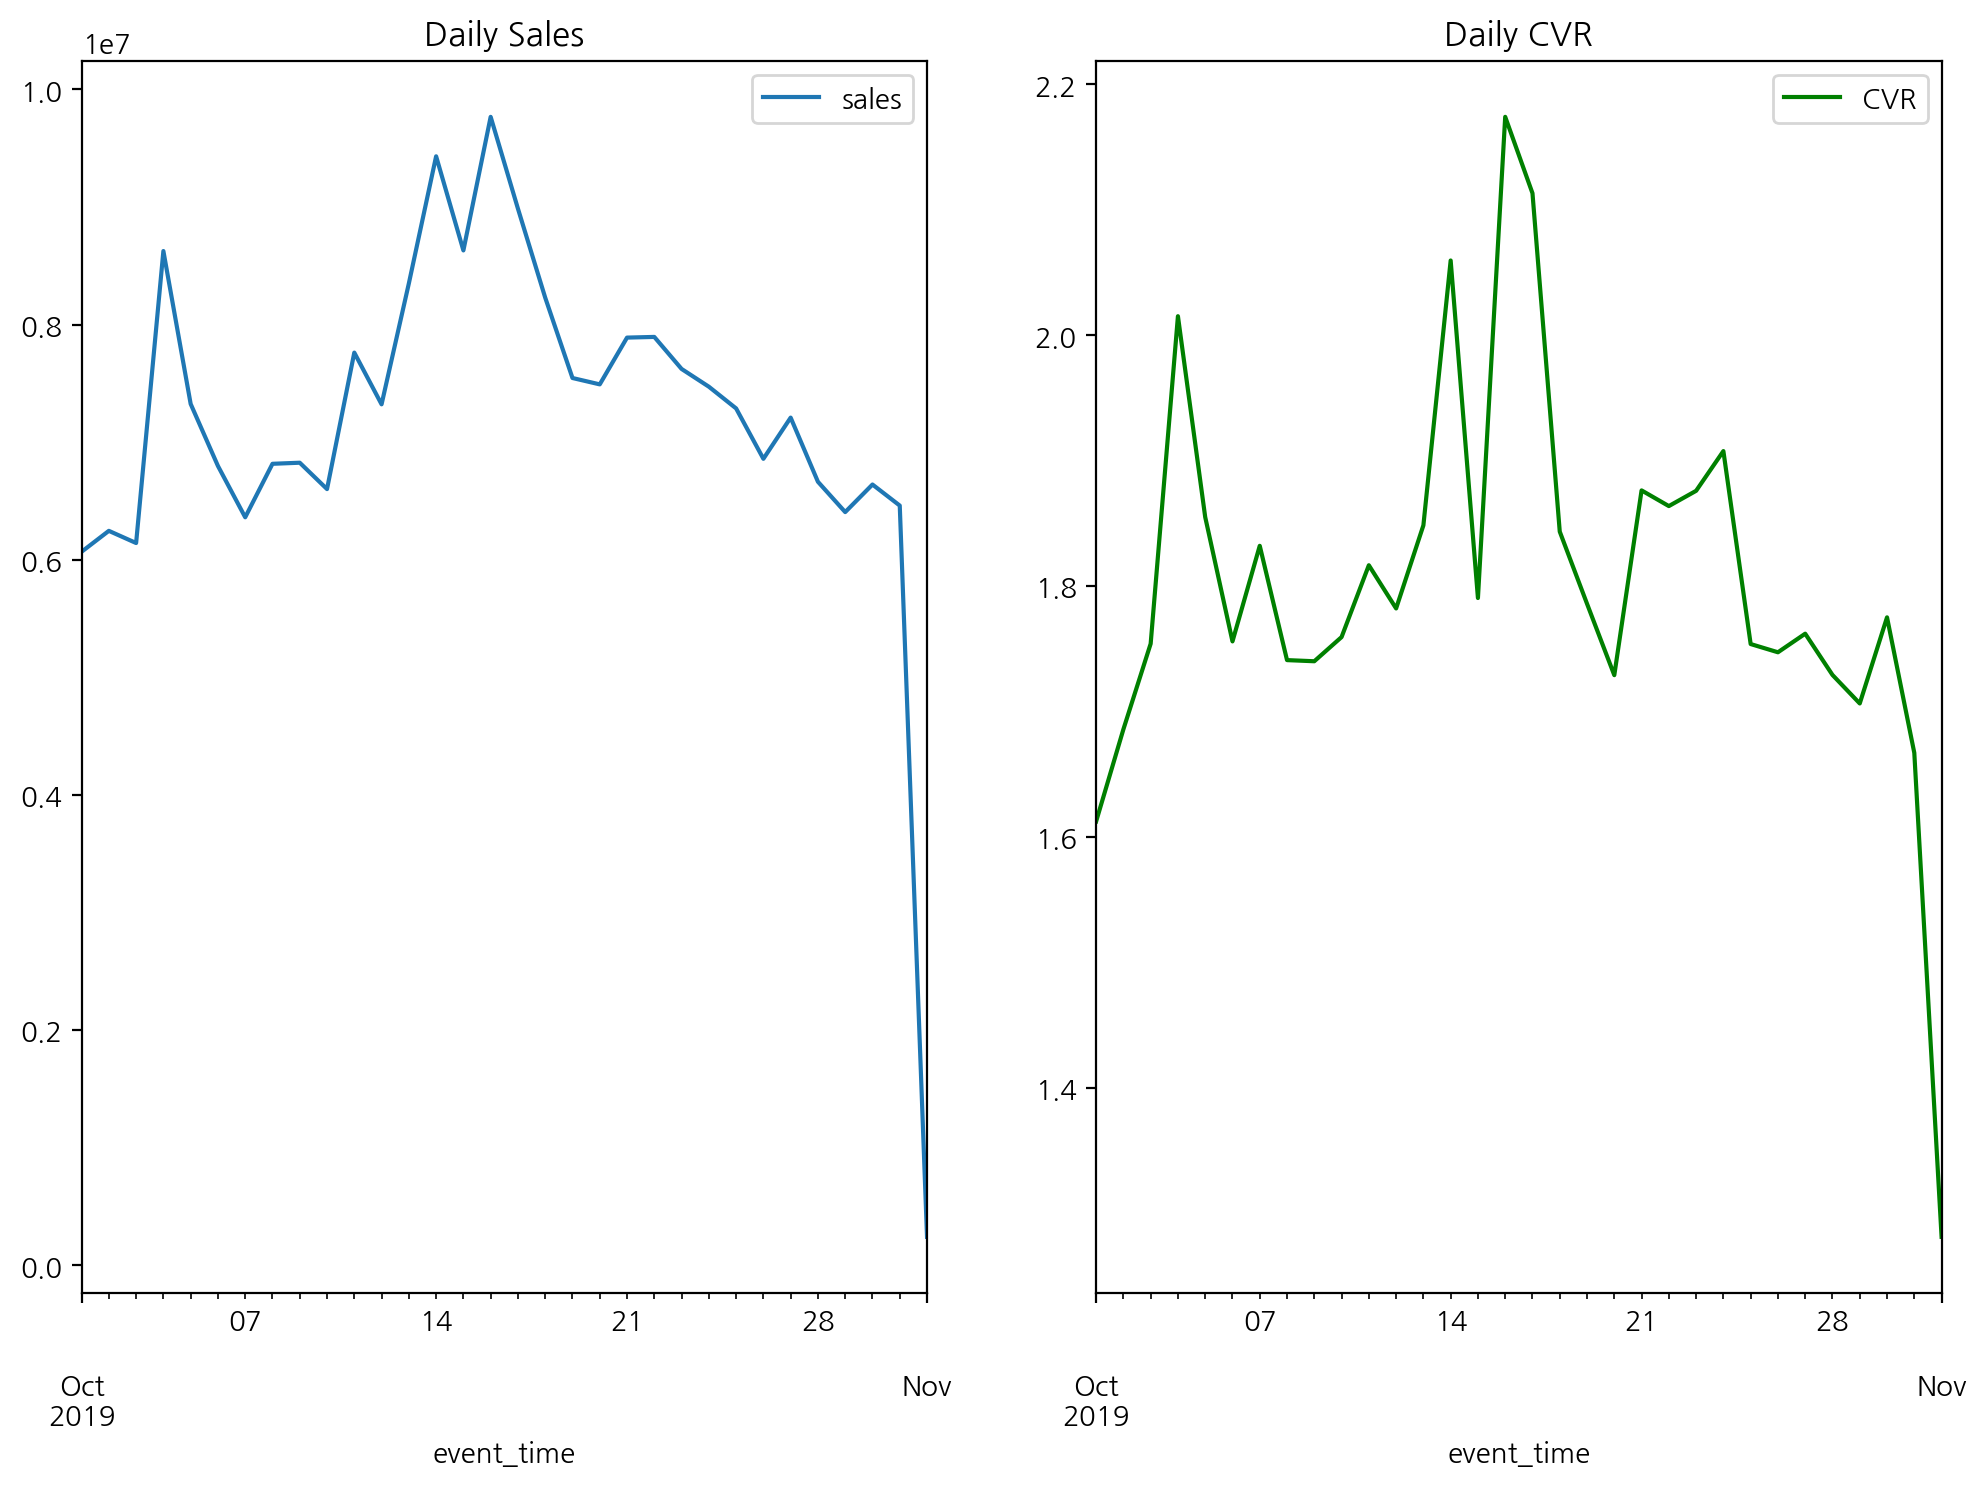

In [28]:
# 일일 매출, CVR 시각화
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

sales_line = df_cvr_sales.plot(x="event_time", y="sales", ax=axes[0])
sales_line.set_title("Daily Sales")

cvr_line = df_cvr_sales.plot(x="event_time", y="CVR", color="green", ax=axes[1])
cvr_line.set_title("Daily CVR")

### CVR 분석 결과
- 전체적으로 Daily Sales와 Daily CVR 같은 방향으로 움직인다
- 특별히 Sales, CVR 높은 기간 : 10월 중순

## 퍼널 분석

### 퍼널분석이란?
- 유저가 서비스 접속 후 상품을 구매하기까지 경로를 가시화하여 전환과 이탈률을 측정함으로서 집중 개선 대상 구간을 발견

- 고객이 유입되고 전환에 이르기까지의 주요 단계를 수치로 확인하는 고객 분석 방법
    - 전환에 이르는 고객 경험 프로레스를 단계별로 나누어 이탈하는 원인을 개선하고 전환율을 높이는 것이 목표

- 고객이 제품을 구매하는 프로세스를 분석해 고객 행동을 파악하고 마케팅 효과를 극대화 하는 것

### 스텝 분류
- `event_type` 컬럼 기준
    - `view` = 1
    - `cart` = 2
    - `purchase` = 3

In [29]:
# 3가지 스텝 분류
funnel_dict = {"view" : 1,
               "cart" : 2,
               "purchase" : 3}

# 분류한 퍼널 스텝을 기반으로, 데이터 프레임 생성
funnel_steps = pd.DataFrame.from_dict(funnel_dict, orient='index', columns=['step_no'])
funnel_steps

,step_no
view,1
cart,2
purchase,3


### 그룹핑
- `user_session`을 기준으로 하는 이유 : 동일한 유저가 다른 세션으로 접속한다면 별도의 건으로 간주해야 한다

In [30]:
# user_session과 event_type으로 groupby
# 가장 시간대가 빠른 해당 이벤트에 대해 추출
grouped = df.groupby(["user_session", "event_type"])["event_time"].agg(np.min)
grouped = pd.DataFrame(grouped)
grouped.head()

event_time
user_session                         event_type                          
00000042-3e3f-42f9-810d-f3d264139c50 view       2019-10-18 14:54:45+04:00
00000056-a206-40dd-b174-a072550fa38c view       2019-10-31 10:23:12+04:00
00000083-8816-4d58-a9b8-f52f54186edc cart       2019-10-06 15:33:54+04:00
                                     purchase   2019-10-06 15:34:30+04:00
                                     view       2019-10-06 15:24:45+04:00

In [31]:
grouped = grouped.merge(funnel_steps, left_on="event_type", right_index=True)
grouped.tail()

,,event_time,step_no
user_session,event_type,,
fffff6b0-1ade-413d-b9b4-5fb0dd26aa34,view,2019-10-05 20:40:10+04:00,1
fffff79f-a682-4f63-ad94-8364fe3d648f,view,2019-10-18 10:42:56+04:00,1
fffff8d4-d31c-4066-a00b-2ace84d33640,view,2019-10-31 22:11:13+04:00,1
fffffa1b-a6f0-483a-8f4b-30db242889b6,view,2019-10-08 15:32:24+04:00,1
fffffc65-7ce9-435c-8b72-1d9f7062fe77,view,2019-10-11 10:10:23+04:00,1


In [32]:
grouped.shape

(10445311, 2)

### 퍼널 테이블 생성
- 각 퍼널의 스텝이 순서대로 column에 자리하게 변경
- `pivot_table` 이용하여, `user_session` 별로 퍼널 스텝 진행 여부를 확인

In [33]:
# pivot table 생성
funnel = grouped.reset_index().pivot(index="user_session", columns="step_no", values="event_time")
funnel.columns = funnel_steps.index
funnel.head()

,view,cart,purchase
user_session,,,
00000042-3e3f-42f9-810d-f3d264139c50,2019-10-18 14:54:45+04:00,NaT,NaT
00000056-a206-40dd-b174-a072550fa38c,2019-10-31 10:23:12+04:00,NaT,NaT
00000083-8816-4d58-a9b8-f52f54186edc,2019-10-06 15:24:45+04:00,2019-10-06 15:33:54+04:00,2019-10-06 15:34:30+04:00
000001fd-1f89-45e8-a3ce-fe3218cabfad,2019-10-25 12:30:42+04:00,2019-10-25 12:34:23+04:00,2019-10-25 12:39:11+04:00
000003eb-b63e-45d9-9f26-f229057c654a,2019-10-03 15:28:52+04:00,NaT,NaT


In [34]:
# view에서 그치는 경우, cart까지 가는 경우, purchase까지 완료하는 경우를 각각 계산하여 step_values로 만든다
# cart, purchase는 앞 단계가 있어야 진행되기 때문에, notnull()을 사용하여 확인하면 자동으로 퍼널 스텝이 이어진다고 볼 수 있다

step_values = [funnel[index].notnull().sum() for index in funnel_steps.index]
step_values

[9242653, 573098, 629560]

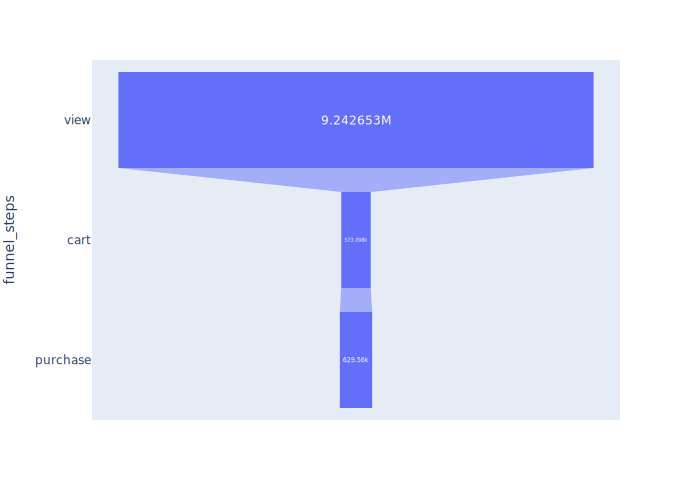

In [35]:
# plotly 사용해서 퍼널 그래프 시각화

df_funnel = dict(step_values=step_values,
                 funnel_steps=funnel_steps.index)
fig = px.funnel(df_funnel, x="step_values", y="funnel_steps")
fig.show()

## 코호트 분석
- 고객 유지율 분석
    - 사이트에 얼마나 다시 방문하였는지
    - 얼마나 다시 상품을 재구매하였는지  
- 특정 고객 집단의 인사이트 발견

코호트 함수 생성

In [36]:
video_list = ['electronics.video.tv', 'electronics.video.projector']
df[df["category_code"].str.contains("video")]["category_code"].value_counts()

category_code
electronics.video.tv               1285034
auto.accessories.videoregister      224076
computers.components.videocards      81811
electronics.camera.video             40032
electronics.video.projector          13154
Name: count, dtype: int64

In [37]:
kitchen_list = df[df["category_code"].str.contains("kitchen")]["category_code"].value_counts().keys().tolist()
kitchen_list

['appliances.kitchen.dishwasher',
 'appliances.kitchen.refrigerators',
 'appliances.kitchen.cooker',
 'appliances.kitchen.meat_grinder',
 'appliances.kitchen.blender',
 'appliances.kitchen.oven',
 'appliances.kitchen.kettle',
 'appliances.kitchen.microwave',
 'furniture.kitchen.crockery',
 'appliances.kitchen.multibaker',
 'appliances.kitchen.multicooker',
 'furniture.kitchen.chair',
 'furniture.kitchen.pan',
 'appliances.kitchen.hood',
 'appliances.kitchen.hob',
 'furniture.kitchen.table',
 'appliances.kitchen.mixer',
 'appliances.kitchen.coffee_machine',
 'appliances.kitchen.grill',
 'appliances.kitchen.juicer',
 'appliances.kitchen.toster',
 'appliances.kitchen.steam_cooker',
 'appliances.kitchen.coffee_grinder']

In [38]:
notebook_list = df[df["category_code"].str.contains("notebook")]["category_code"].value_counts().keys().tolist()
notebook_list

['computers.notebook']

In [39]:
# 일별, 주별 코호트 분석 둘다 가능한 함수 생성
# 처음의 순 방문자 수에 비해 각 기간의 순 방문자수가 얼마나 변화하였는가를 return
def cohort_pct(df, category_name=None, brand=None, daily_or_weekly="daily"):
    # 코호트 분석 위해 컬럼 조정
    cohort_col = ["event_time", "event_type", "product_id", "category_id", "category_code", "brand", "user_id", "user_session"]
    df_co = df[cohort_col].reset_index(drop=True)

    # 구매 활동한 고객만 따로 필터링
    pur_cond = (df_co["event_type"] == "purchase")

    if category_name:
        cat_cond = (df_co["category_code"] == category_name)
        co_purchase = df_co.loc[pur_cond & cat_cond].reset_index(drop=True)
    elif brand:
        br_cond = (df_co["brand"] == brand)
        co_purchase = df_co.loc[pur_cond & br_cond].reset_index(drop=True)
    else:
        co_purchase = df_co.loc[pur_cond].reset_index(drop=True)
    
    if daily_or_weekly == "daily":
        co_purchase["event_time"] = co_purchase["event_time"].dt.strftime("%Y-%m-%d")
    else:
        co_purchase["event_time"] = co_purchase["event_time"].dt.week - 39
    
    co_purchase["OrderPeriod"] = co_purchase["event_time"]

    # 첫 번째 주문을 토대로 코호트 그룹 설정
    # 데이터프레임의 인덱스 user_id로 설정
    co_purchase.set_index("user_id", inplace=True)

    # user_id별 groupby하여 첫 주문일자 추출
    FirstOrder = co_purchase.groupby(co_purchase.index)["event_time"].min()

    # FirstOrder, co_purchase의 동일한 인덱스를 기준으로 데이터 배치하여 FirstOrdef 칼럼 추가
    co_purchase["FirstOrder"] = FirstOrder
    co_purchase.reset_index(inplace=True)

    # 첫 주문일자를 나타내는 FirstOrder와 주문별 기간 나타내는 OrdefPeriod 함께 전달하여
    # 첫 방문 기간과 주문 기간 기준으로 데이터를 그룹화
    pur_grouped = co_purchase.groupby(["FirstOrder", "OrderPeriod"])

    # 그룹화한 pur_grouped에서 user_id를 집계하여, unique 값의 개수를 nunique 함수를 통해 센다
    # -> 고객이 여러번 방문했다 하더라고 한 번으로 집계하여 월별 순 방문자수를 파악할 수 있다
    cohorts_pur = pur_grouped["user_id"].nunique()
    cohorts_pur = cohorts_pur.reset_index()

    # user_id 컬럼이 순 방문자수를 집계한 데이터이기 때문에 이름 변경해준다
    # user_id -> TotalUsers
    cohorts_pur.rename({"user_id":"TotalUsers"}, axis=1, inplace=True)

    each_period_pur = cohorts_pur["FirstOrder"].value_counts().sort_index()

    # 기간별 레이블 붙이기
    # 처음 들어온 기간은 0, 두번째 기간은 1 이런식으로 숫자 레이블을 붙인다

    cohortperiod = []

    # 32 까지 숫자가 나열된 each_period_pur 변수를 for문 사용하여 기간 생성하고 cohortperiod 리스트에 할당
    for x in each_period_pur:
        for y in range(x):
            cohortperiod.append(y)

    # 위에서 만든 cohortperiod 변수를 CohortPeriod 칼럼으로 만든다
    cohorts_pur["CohortPeriod"] = cohortperiod

    # FirstOrder (동일한 경험)과 CohortPeriod (동일한 기간) 이라는 인덱스로 만들어 본다
    cohorts_pur.set_index(["FirstOrder", "CohortPeriod"], inplace=True)

    # unstack(1)을 하게되면 생성된 멀티 인덱스 중 두번째 인덱스 (CohortPeriod)가 칼럼으로 변경되고,
    # 그 결과 y축은 코호트, x축은 기간으로 표현되는 코호트 분석의 형태를 갖추게 된다
    cohorts_pur = cohorts_pur["TotalUsers"].unstack(1)

    # 코호트 분석은 숫자가 아닌 비율로 표현되는 경우가 많다
    # 비율의 의미 : 처음의 순 방문자 수에 비해 각 기간의 순 방문자수가 얼마나 변화하였는가
    # -> 비율을 구하려면, 전체 데이터를 첫 코호트 기간의 순방문자로 나눠주면 된다
    # cohorts_pur[0] : 첫번째 칼럼 -> 각 코호트 첫번째 기간 (0일)에 대한 데이터로 구성되어 있다

    # 전체 데이터를 첫 코호트 기간의 순방문자 (cohort_pur[0])으로 나누어 준다
    # divide 함수에 axis=0을 명시해야 전체 데이터를 첫 코호트 기간의 데이터로 나눌 수 있다
    user_retention_pur = cohorts_pur.divide(cohorts_pur[0], axis=0)

    return user_retention_pur

In [40]:
# 일별, 주별 코호트 분석 둘다 가능한 함수 생성
# 구매 횟수를 count한 데이터프레임 return
def cohort_cnt(df, category_name=None, brand=None, daily_or_weekly="daily"):
    # 코호트 분석 위해 컬럼 조정
    cohort_col = ["event_time", "event_type", "product_id", "category_id", "category_code", "brand", "user_id", "user_session"]
    df_co = df[cohort_col].reset_index(drop=True)

    # 구매 활동한 고객만 따로 필터링
    pur_cond = (df_co["event_type"] == "purchase")

    if category_name:
        cat_cond = (df_co["category_code"] == category_name)
        co_purchase = df_co.loc[pur_cond & cat_cond].reset_index(drop=True)
    elif brand:
        br_cond = (df_co["brand"] == brand)
        co_purchase = df_co.loc[pur_cond & br_cond].reset_index(drop=True)
    else:
        co_purchase = df_co.loc[pur_cond].reset_index(drop=True)
    
    if daily_or_weekly == "daily":
        co_purchase["event_time"] = co_purchase["event_time"].dt.strftime("%Y-%m-%d")
    else:
        co_purchase["event_time"] = co_purchase["event_time"].dt.isocalendar().week - 39
    
    co_purchase["OrderPeriod"] = co_purchase["event_time"]

    # 첫 번째 주문을 토대로 코호트 그룹 설정
    # 데이터프레임의 인덱스 user_id로 설정
    co_purchase.set_index("user_id", inplace=True)

    # user_id별 groupby하여 첫 주문일자 추출
    FirstOrder = co_purchase.groupby(co_purchase.index)["event_time"].min()

    # FirstOrder, co_purchase의 동일한 인덱스를 기준으로 데이터 배치하여 FirstOrdef 칼럼 추가
    co_purchase["FirstOrder"] = FirstOrder
    co_purchase.reset_index(inplace=True)

    # 첫 주문일자를 나타내는 FirstOrder와 주문별 기간 나타내는 OrdefPeriod 함께 전달하여
    # 첫 방문 기간과 주문 기간 기준으로 데이터를 그룹화
    pur_grouped = co_purchase.groupby(["FirstOrder", "OrderPeriod"])

    # 그룹화한 pur_grouped에서 user_id를 집계하여, unique 값의 개수를 nunique 함수를 통해 센다
    # -> 고객이 여러번 방문했다 하더라고 한 번으로 집계하여 월별 순 방문자수를 파악할 수 있다
    cohorts_pur = pur_grouped["user_id"].nunique()
    cohorts_pur = cohorts_pur.reset_index()

    # user_id 컬럼이 순 방문자수를 집계한 데이터이기 때문에 이름 변경해준다
    # user_id -> TotalUsers
    cohorts_pur.rename({"user_id":"TotalUsers"}, axis=1, inplace=True)

    each_period_pur = cohorts_pur["FirstOrder"].value_counts().sort_index()

    # 기간별 레이블 붙이기
    # 처음 들어온 기간은 0, 두번째 기간은 1 이런식으로 숫자 레이블을 붙인다

    cohortperiod = []

    # 32 까지 숫자가 나열된 each_period_pur 변수를 for문 사용하여 기간 생성하고 cohortperiod 리스트에 할당
    for x in each_period_pur:
        for y in range(x):
            cohortperiod.append(y)

    # 위에서 만든 cohortperiod 변수를 CohortPeriod 칼럼으로 만든다
    cohorts_pur["CohortPeriod"] = cohortperiod

    # FirstOrder (동일한 경험)과 CohortPeriod (동일한 기간) 이라는 인덱스로 만들어 본다
    cohorts_pur.set_index(["FirstOrder", "CohortPeriod"], inplace=True)

    # unstack(1)을 하게되면 생성된 멀티 인덱스 중 두번째 인덱스 (CohortPeriod)가 칼럼으로 변경되고,
    # 그 결과 y축은 코호트, x축은 기간으로 표현되는 코호트 분석의 형태를 갖추게 된다
    cohorts_pur = cohorts_pur["TotalUsers"].unstack(1)

    return cohorts_pur

In [41]:
# 중분류가 smartphone인 것들 카운팅해서 코호트 분석
smartphone_cnt = cohort_cnt(df, category_name="electronics.smartphone", daily_or_weekly="weekly")

In [42]:
# 중분류가 video인 것들 카운팅해서 코호트 분석
video_cnt = 0
# video_list = ['electronics.video.tv', 'electronics.video.projector']
for category in video_list:
    coh = cohort_cnt(df, category_name=category, daily_or_weekly="weekly")
    video_cnt += coh

In [43]:
# 중분류가 kitchen인 것들 카운팅해서 코호트 분석
kitchen_cnt = 0
for category in kitchen_list:
    coh = cohort_cnt(df, category_name=category, daily_or_weekly="weekly")
    kitchen_cnt += coh

In [44]:
# 중분류 notebook인 것 코호트 분석
notebook_cnt = cohort_cnt(df, category_name='computers.notebook', daily_or_weekly="weekly")

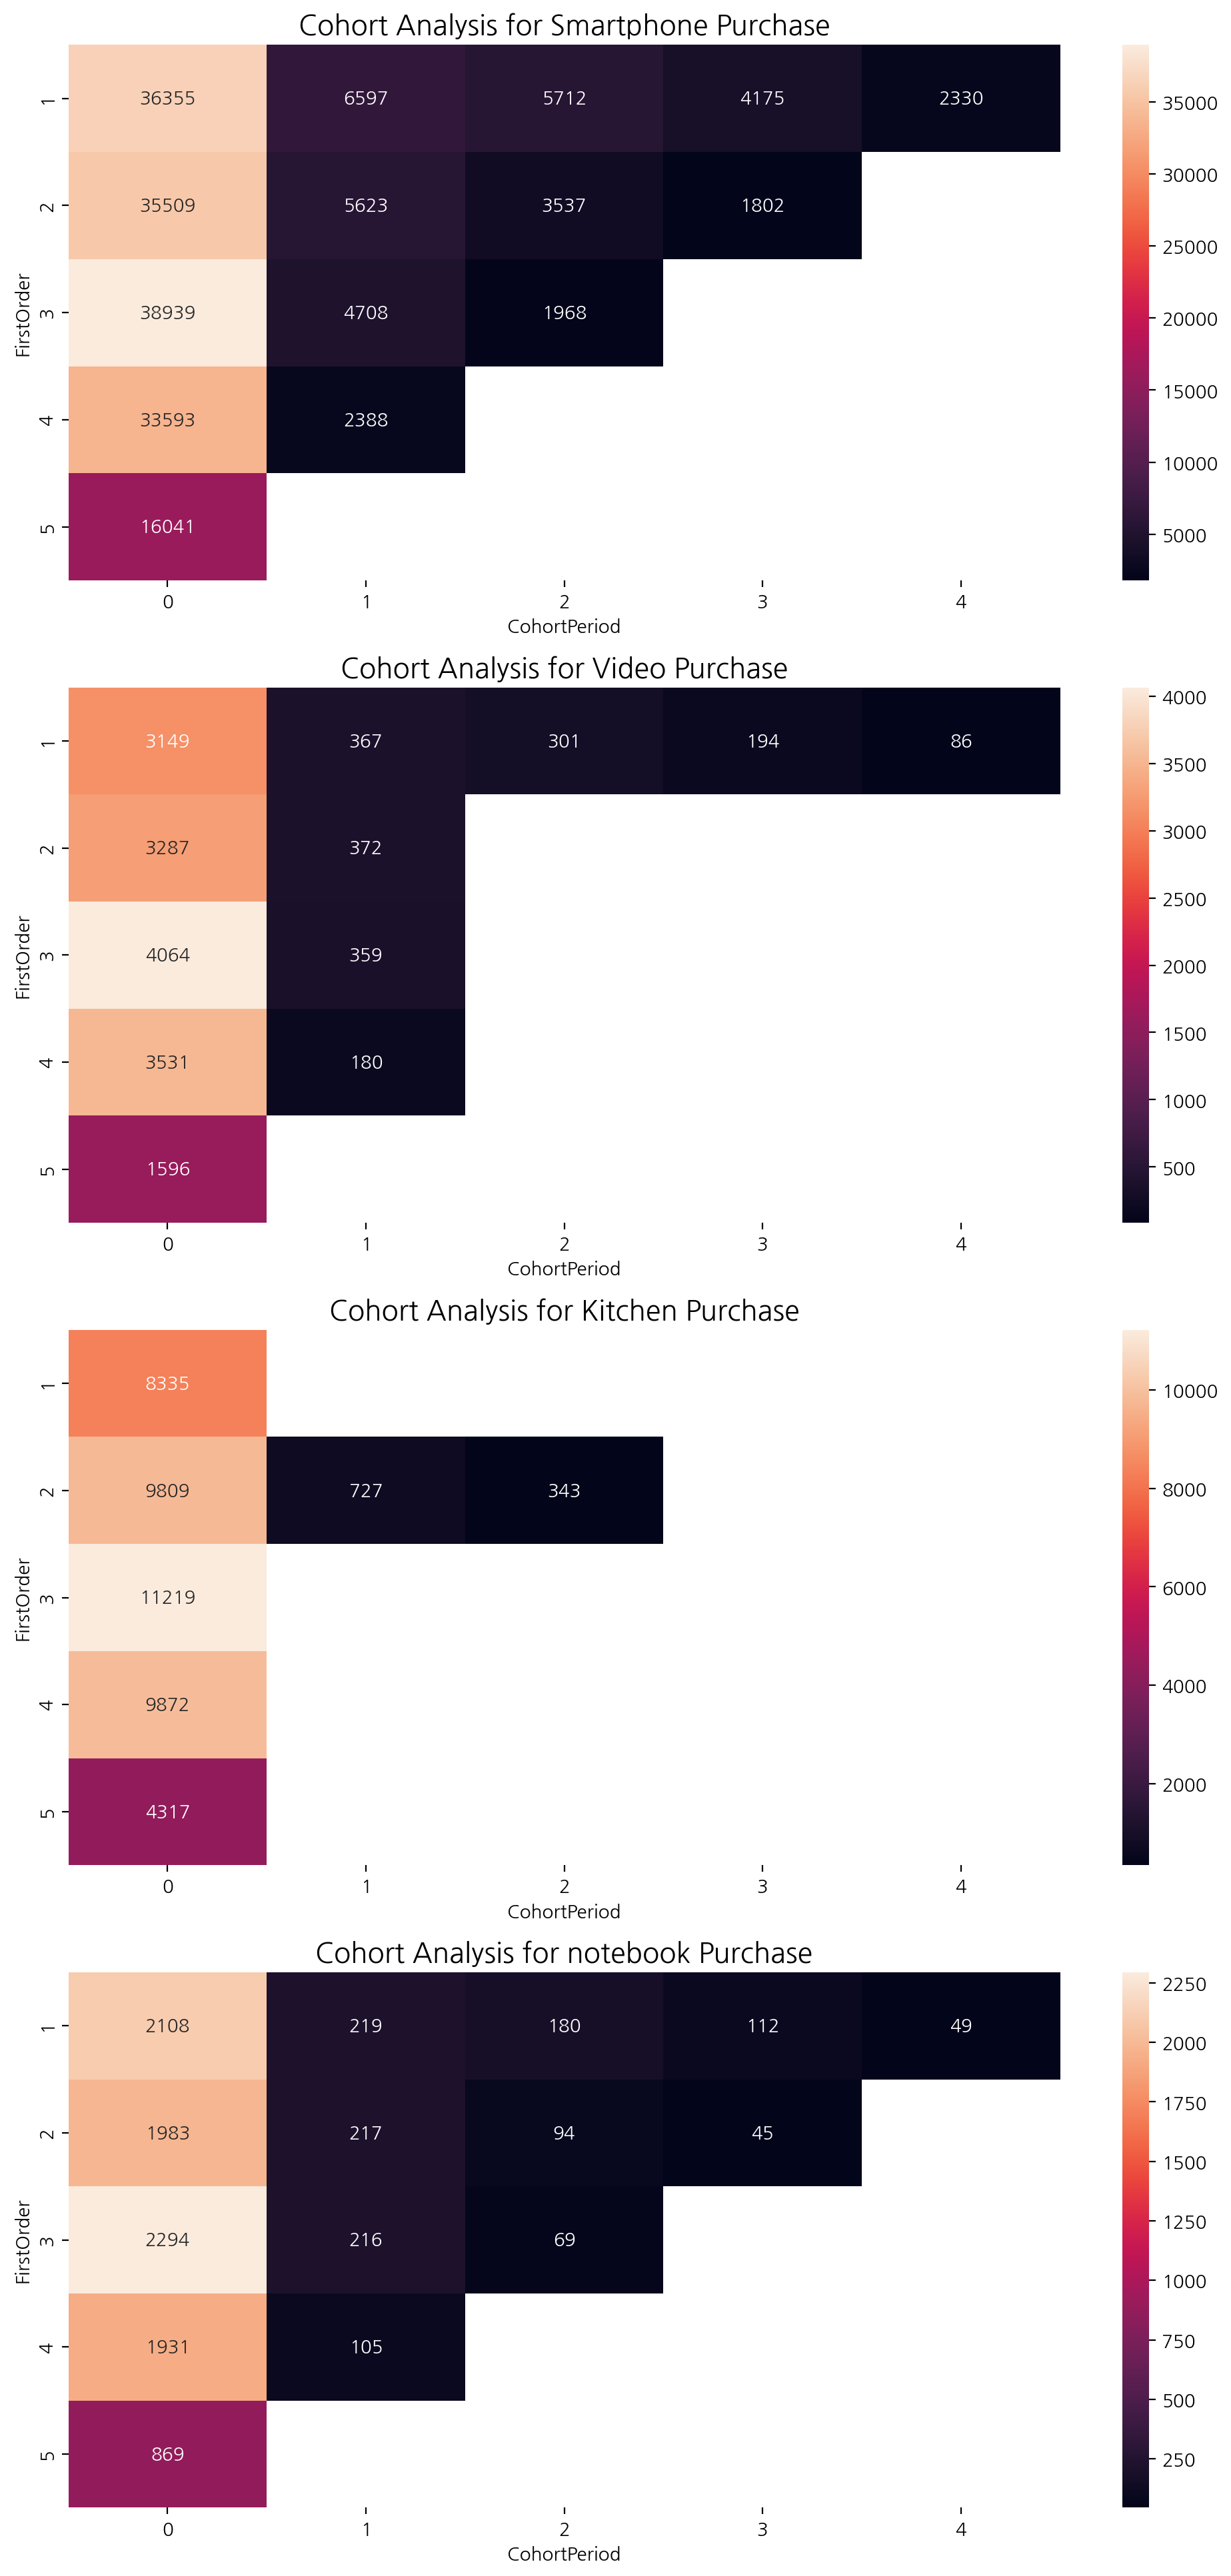

In [45]:
# smartphone, video, kitchen, notebook 코호트 분석 시각화
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 24))

phone_cnt = sns.heatmap(smartphone_cnt, annot=True, fmt=".0f", ax=ax[0])
phone_cnt.set_title("Cohort Analysis for Smartphone Purchase", fontsize=15)

video_cnt = sns.heatmap(video_cnt, annot=True, fmt=".0f", ax=ax[1])
video_cnt.set_title("Cohort Analysis for Video Purchase", fontsize=15)

kitchen_cnt = sns.heatmap(kitchen_cnt, annot=True, fmt=".0f", ax=ax[2])
kitchen_cnt.set_title("Cohort Analysis for Kitchen Purchase", fontsize=15)

notebook_cnt = sns.heatmap(notebook_cnt, annot=True, fmt=".0f", ax=ax[3])
notebook_cnt.set_title("Cohort Analysis for notebook Purchase", fontsize=15)

plt.show()

##### 코호트 분석 정리  

1. Funnel 분석을 통해 주요 이탈이 발생하는 구간 (view -> cart)을 기준으로 잡음
2. view가 cart로 이어지는 확률이 높은 카테고리 (중분류) 중, 매출이 높은 순서대로 정렬
    - smartphone, video (주로 tv), kitchen, notebook
3. 코호트 분석의 결과, 해당 카테고리들은 고관여 제품의 특징 갖는다
    - 관여도
        - 소비자 행동 분석하는 분야에서 쓰는 용어
        - 특정 상황에서 소비자가 관심 갖는 강도, 흥미의 정도, 개인적인 중요도의 정도
    - 고관여 제품 : 관심이나 흥미 중요도 높게 생각하는 상품, 서비스
    - 고관여 제품 특징
        - 쇼핑시 필요로 하는 정보의 양은 많은편이며, 구매빈도는 낮다. 
        - 상품 단가는 높고 주요 상품군은 생필품 같이 20만원 이상의 전문 상품군
        - 구매 행위는 검색과 비교를 통한 계획 구매의 특징
            - 본인의 욕구, 취향, 경제 사정, 기능 등 다양한 요소 비교하고 분석한다
        - 이성적 기능 강조하거나 심미적이고 감성적인 부분 강조    
    - 출처
        - http://www.asiaa.co.kr/news/articleView.html?idxno=43969
        - http://www.ccdailynews.com/news/articleView.html?idxno=2026178
